# Import Libraries

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline

# Import Datasets

In [101]:
train_data_customers = pd.read_csv('aily_case_training_data.csv')
train_data_hist = pd.read_csv('aily_case_training_hist_data.csv')
train_data_output = pd.read_csv('aily_case_training_output.csv')

In [102]:
test_data_customers = pd.read_csv('aily_case_test_data.csv')
test_data_hist = pd.read_csv('aily_case_test_hist_data.csv')
test_data_output = pd.read_csv('aily_case_test_output_template.csv')

## Merge Subsets to  train_dataset  & test_dataset


In [103]:
train_data = train_data_customers.merge(train_data_hist, how = 'inner', on = 'contract_id')
train_data = train_data.merge(train_data_output, how = 'inner', on = 'contract_id')

In [104]:
test_data = test_data_customers.merge(test_data_hist, how = 'inner', on = 'contract_id')
test_data = test_data.merge(test_data_output, how = 'inner', on = 'contract_id')

**Note:** Here we can observe that we have to deal with multiple data types (Objects, integers, floating numbers).

In [105]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   contract_id                          193002 non-null  object 
 1   company_category                     78570 non-null   object 
 2   campaing_code_elect                  0 non-null       float64
 3   channel                              142407 non-null  object 
 4   elect_cons_at_12m                    193002 non-null  int64  
 5   gas_cons_at_12m                      193002 non-null  int64  
 6   elect_cons_last_month                193002 non-null  int64  
 7   contract_activation_date             193002 non-null  object 
 8   contract_end_date                    192981 non-null  object 
 9   contract_fist_act_date               42042 non-null   object 
 10  contract_last_mod_date               191127 non-null  object 
 11  contract_rene

In [9]:
train_data.describe()

,campaing_code_elect,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,...,total_net_margin,customer_antiquity_in_years,subscribed_power,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,has_churned_over_next_3m
count,0.0,1.930020e+05,1.930020e+05,1.930020e+05,42042.000000,42042.000000,42042.000000,42042.000000,193002.000000,193002.000000,...,192822.000000,193002.000000,192966.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,193002.000000
mean,NaN,2.288525e+05,1.631189e+04,1.456856e+04,233.531710,437.858090,4692.006822,315.574666,1340.981453,1733.104132,...,107.996236,5.031134,25.794061,0.127477,0.043164,0.039137,39.077768,8.084069,4.893413,0.099009
std,NaN,7.981469e+05,9.078554e+04,6.164136e+04,451.732810,846.972195,6637.357635,695.423491,2283.206598,4777.646135,...,181.747627,1.676171,27.260369,0.022710,0.039691,0.046303,4.904798,9.714639,5.899199,0.298675
min,NaN,-1.471120e+05,-1.552000e+03,-6.837900e+04,-253.791433,-475.843867,-3062.455913,0.000000,-9441.942657,-77792.199408,...,-2055.717345,1.000000,1.251901,0.000000,0.000000,0.000000,-0.160349,-0.073866,-0.049402,0.000000
25%,NaN,6.937000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1416.753455,0.000000,290.370997,0.000000,...,25.749792,4.000000,15.648757,0.113901,0.000000,0.000000,36.735692,0.000000,0.000000,0.000000
50%,NaN,1.800300e+04,0.000000e+00,6.730000e+02,113.279132,212.391646,2674.835319,64.381316,667.007498,343.413309,...,59.293393,5.000000,17.346335,0.132036,0.067813,0.000000,39.926855,0.000000,0.000000,0.000000
75%,NaN,5.897300e+04,0.000000e+00,3.087000e+03,275.516770,516.577583,5193.812589,348.077227,1522.760387,1811.550628,...,136.627000,6.000000,24.787632,0.137101,0.080741,0.092463,40.087205,18.392143,12.300087,0.000000
max,NaN,1.890300e+07,2.141273e+06,3.396121e+06,8738.870635,16384.863529,99235.655140,14775.946969,58725.903411,159328.330681,...,12174.122227,16.000000,625.950297,0.253795,0.182288,0.145403,53.616556,27.574100,13.233853,1.000000


In [10]:
test_data.describe()

,campaing_code_elect,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_bill_baseline_elect_next_month,fcst_bill_baseline_elect_cal_year,fcst_bill_baseline_elect_12m,fcst_consumption_elect_next_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,...,customer_antiquity_in_years,subscribed_power,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,does_churn,prob_of_churn
count,0.0,4.823600e+04,4.823600e+04,48236.000000,10514.000000,10514.000000,10514.000000,10514.000000,48236.000000,48236.000000,...,48236.000000,48224.000000,47934.000000,47934.000000,47934.000000,47934.000000,47934.000000,47934.000000,0.0,0.0
mean,NaN,2.121259e+05,2.301259e+04,17161.410088,316.154494,432.905515,4634.687250,300.865305,1783.701949,1842.060630,...,4.995916,22.909244,0.127577,0.042928,0.039116,39.112117,8.087181,4.903335,NaN,NaN
std,NaN,7.145860e+05,1.293165e+05,64600.171227,805.836210,1103.419202,7392.421248,988.721705,3081.950946,4889.111274,...,1.686514,24.710983,0.022690,0.039576,0.046234,4.749264,9.706591,5.903200,NaN,NaN
min,NaN,-8.688500e+04,-3.056000e+03,-18699.000000,0.000000,0.000000,0.000000,-2.581793,-5625.324015,-20605.263539,...,2.000000,0.000000,0.000000,0.000000,0.000000,-0.146943,-0.073866,-0.049402,NaN,NaN
25%,NaN,5.998000e+03,0.000000e+00,0.000000,0.000000,0.000000,1299.761162,0.000000,372.584090,0.000000,...,4.000000,13.986045,0.113901,0.000000,0.000000,36.735692,0.000000,0.000000,NaN,NaN
50%,NaN,1.662600e+04,0.000000e+00,822.000000,134.353889,183.968726,2532.287387,46.002860,879.233767,364.104481,...,5.000000,15.503252,0.132036,0.067753,0.000000,39.926855,0.000000,0.000000,NaN,NaN
75%,NaN,5.556700e+04,0.000000e+00,3547.000000,352.408976,482.548222,4879.161632,289.741431,2050.111333,2013.059330,...,6.000000,22.287043,0.137101,0.080656,0.092463,40.087205,18.392143,12.300087,NaN,NaN
max,NaN,6.812156e+06,2.011326e+06,667104.000000,15862.315013,21720.025431,86672.978815,22565.984152,67159.961507,162056.994976,...,13.000000,456.504524,0.253795,0.134539,0.128754,53.616556,27.574098,13.233853,NaN,NaN


**Notes:** At first glance, we notice a few interest facts. 
There are some negative values on features correlated with consumption and pricing that we have to take care of them later on data pre-processing.

Also, some features like **elect_cons_at_12m**, **gas_cons_at_12m**	and **elect_cons_last_month** have a great standard deviation which may indicates the existence of outlier values. Once again, we'll take care them later

# EDA

Let's have a first visualization of the distribution of the features

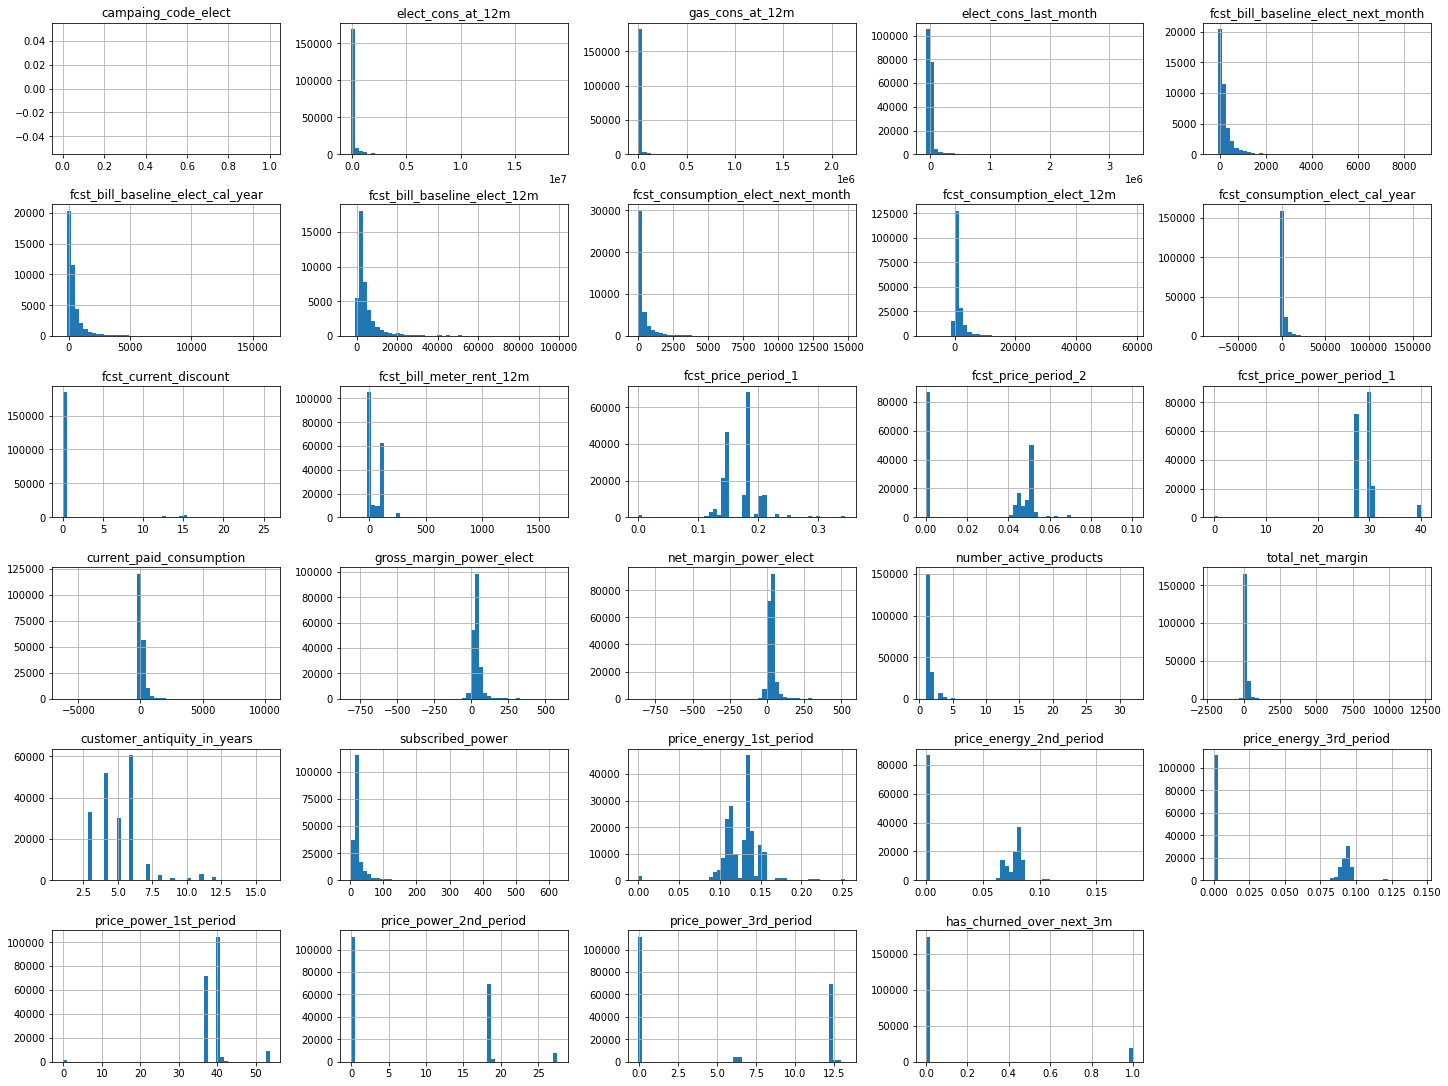

In [11]:
train_data.hist(bins=50,figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

**Notes:** 

- Campaign code elect actually has no entries. We are going to delete it later
- Features relevant to consumption and forecasting like:
    - elect_cons_at_12m, gas_cons_at_12m, elect_cons_last_month 
    - fcst_bill_baseline_elect_next_month, fcst_bill_baseline_elect_cal_year, fcst_bill_baseline_elect_12m, fcst_consumption_elect_next_month, fcst_consumption_elect_12m and fcst_consumption_elect_cal_year are skewed to the right. 
    - Also, **subscribed power** is another highly skewed feature. 


    Having that in mind, we could assume that there are a lot of outliers at those, but we'll examine that later with plotboxes.

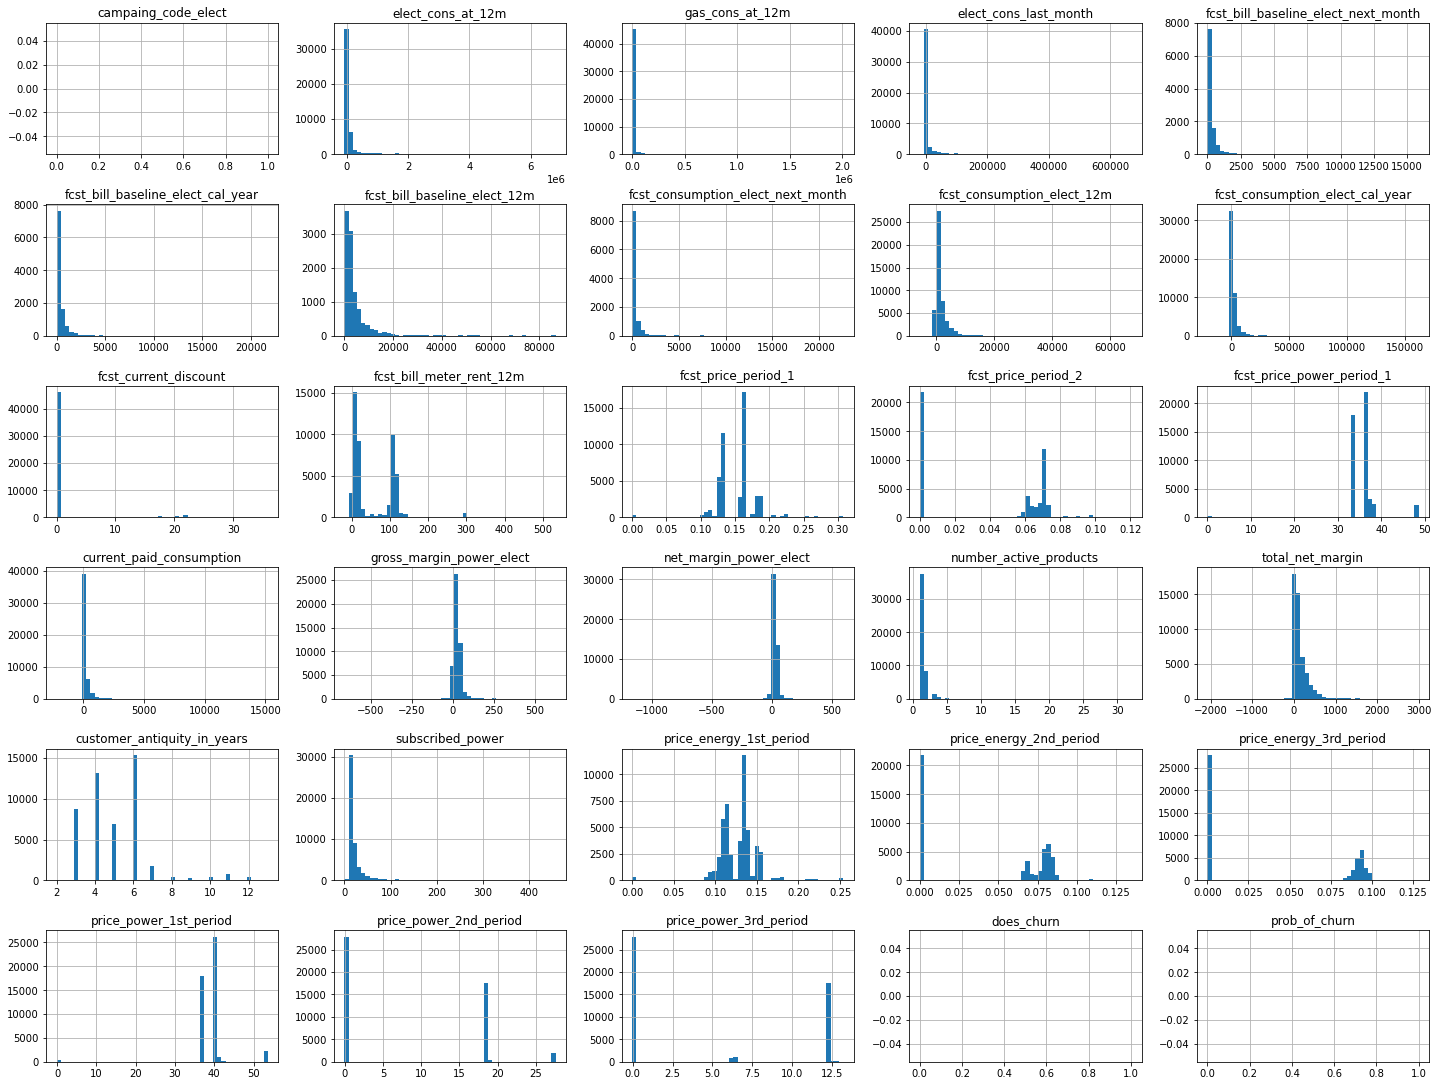

In [12]:
test_data.hist(bins=50,figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

## Check for missing values

In [13]:
total_size = train_data.size
total_missing_values = train_data.isna().sum().sum()
print(f'{total_missing_values} of {total_size} entries are missing values in Training Dataset')

1130954 of 7720080 entries are missing values in Training Dataset


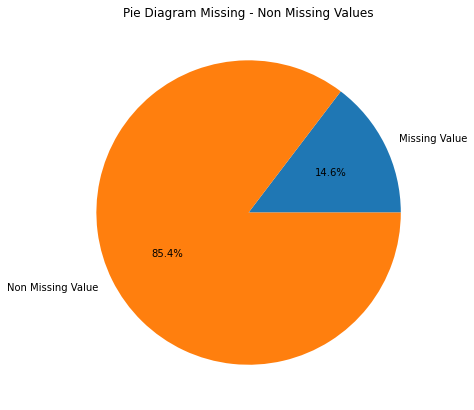

In [14]:
# Pie chart of % Missing Values
values = [total_missing_values, total_size - total_missing_values]
lab = ['Missing Value', 'Non Missing Value']
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels = lab, autopct='%1.1f%%')
plt.title('Pie Diagram Missing - Non Missing Values')
plt.show()

 as we can see, features have a lot of missing values. So we have to clear them.

At first, I'm goint to plot a barplot presenting the percentage of the missing values for each column

In [7]:
percent_missing_values = train_data.isnull().sum()*100 / len(train_data)
missing_value_df = pd.DataFrame({'feature': train_data.columns,
                                 '% missing values': percent_missing_values}).sort_values(by = "% missing values", ascending=False)

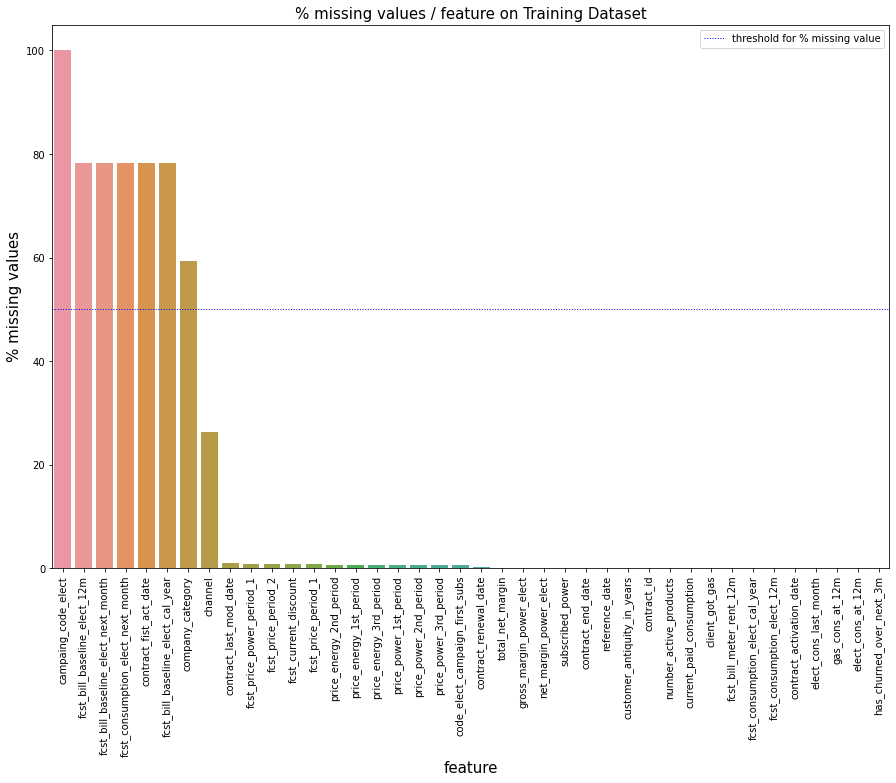

In [8]:
plt.figure(figsize=(15,10))
plt.axhline(y=50, linewidth=1, label= 'threshold for % missing value', color='b', linestyle='dotted')
plt.legend(loc = 'upper right')
plt.xlabel('Features', fontsize=15)
plt.ylabel('% missing values', fontsize=15)
plt.title('% missing values / feature on Training Dataset', fontsize=15)
plt.xticks(rotation=90)
sns.color_palette("rocket")
sns.barplot(x = 'feature', y = '% missing values', data = missing_value_df)
plt.show()

**Note:** As we can easily notice, there are some features that have a really high percentage of missing values. We have to remove certain of them from the dataset as for sure will have a negative impact on the performance.

For that reason an horizontal dotted line as 50% has been plotted above as a penalty threshold. Thus, features with a percentage of missing values greater than 50 % will be removed both from training and test dataset.

In [9]:
df1 = pd.DataFrame({"Missing values (%)": train_data.isnull().sum()*100 / len(train_data)})
df1 = df1.loc[df1['Missing values (%)'] >= 50]
rows_to_be_removed = list(df1.index.values)
train_data = train_data.drop(rows_to_be_removed, axis = 1)
test_data = test_data.drop(rows_to_be_removed, axis = 1)
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   contract_id                      193002 non-null  object 
 1   channel                          142407 non-null  object 
 2   elect_cons_at_12m                193002 non-null  int64  
 3   gas_cons_at_12m                  193002 non-null  int64  
 4   elect_cons_last_month            193002 non-null  int64  
 5   contract_activation_date         193002 non-null  object 
 6   contract_end_date                192981 non-null  object 
 7   contract_last_mod_date           191127 non-null  object 
 8   contract_renewal_date            192525 non-null  object 
 9   fcst_consumption_elect_12m       193002 non-null  float64
 10  fcst_consumption_elect_cal_year  193002 non-null  float64
 11  fcst_current_discount            191495 non-null  float64
 12  fc

In [10]:
percent_missing_values = test_data.isnull().sum()*100 / len(test_data)
missing_value_df = pd.DataFrame({'feature': test_data.columns,
                                 '% missing values': percent_missing_values}).sort_values(by = "% missing values", ascending=False)

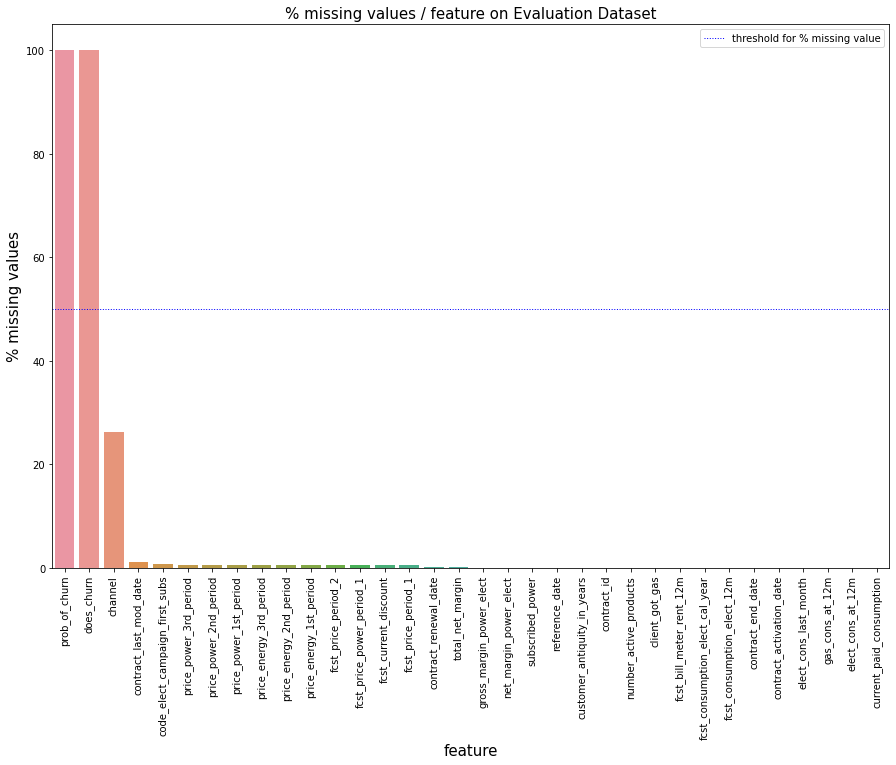

In [11]:
plt.figure(figsize=(15,10))
plt.axhline(y=50, linewidth=1, label= 'threshold for % missing value', color='b', linestyle='dotted')
plt.legend(loc = 'upper right')
plt.xlabel('Features', fontsize=15)
plt.ylabel('% missing values', fontsize=15)
plt.title('% missing values / feature on Evaluation Dataset', fontsize=15)
plt.xticks(rotation=90)
sns.color_palette("rocket")
sns.barplot(x = 'feature', y = '% missing values', data = missing_value_df)
plt.show()

as we have missing values in channel, both in training and test dataset we will remove those features. Later on the evaluation, if we notice a poor perfomance we are going to come back on that stage

In [12]:
train_data = train_data.drop(['channel'], axis=1)
test_data = test_data.drop(['channel'], axis=1)

<AxesSubplot:>

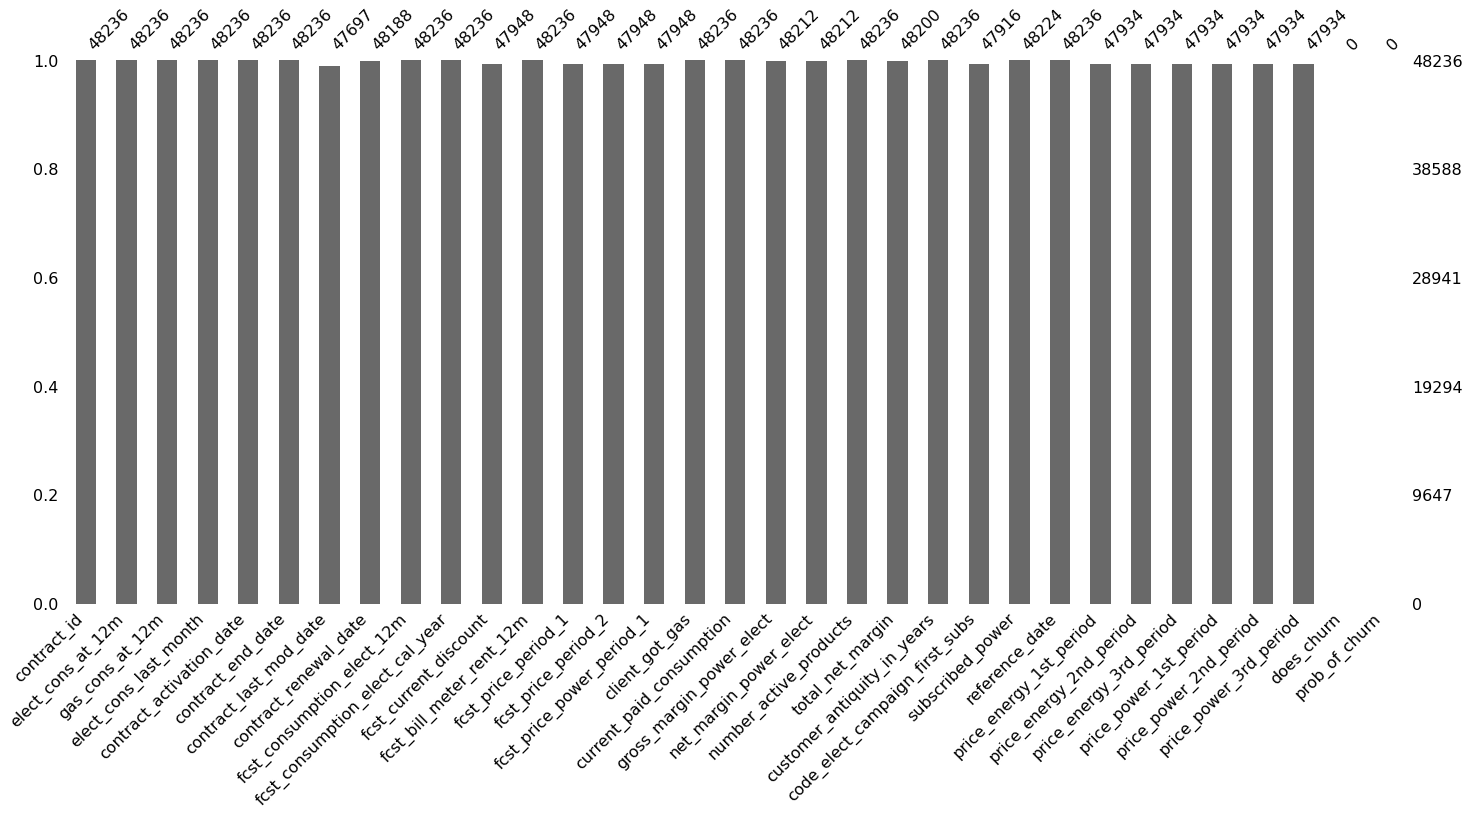

In [13]:
msno.bar(test_data)

# Data Pre-processing

## Delete Duplicated entries on the Datasets

In [14]:
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

In [15]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   contract_id                      193002 non-null  object 
 1   elect_cons_at_12m                193002 non-null  int64  
 2   gas_cons_at_12m                  193002 non-null  int64  
 3   elect_cons_last_month            193002 non-null  int64  
 4   contract_activation_date         193002 non-null  object 
 5   contract_end_date                192981 non-null  object 
 6   contract_last_mod_date           191127 non-null  object 
 7   contract_renewal_date            192525 non-null  object 
 8   fcst_consumption_elect_12m       193002 non-null  float64
 9   fcst_consumption_elect_cal_year  193002 non-null  float64
 10  fcst_current_discount            191495 non-null  float64
 11  fcst_bill_meter_rent_12m         193002 non-null  float64
 12  fc

## Deal With Different Types of Variables


### Date formats
There is a need to transform variables that correspond to dates to Datetime variables in order to take advantage of them later.

In [16]:
import datetime 

In [17]:
#make a list of date features
train_data.head()
date_features = []
for col in train_data.columns:
    if col.endswith("date"):
        print(col)
        date_features.append(col)
        train_data[col] = pd.to_datetime(train_data[col])
        test_data[col] = pd.to_datetime(test_data[col])

contract_activation_date
contract_end_date
contract_last_mod_date
contract_renewal_date
reference_date


In [18]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   contract_id                      193002 non-null  object        
 1   elect_cons_at_12m                193002 non-null  int64         
 2   gas_cons_at_12m                  193002 non-null  int64         
 3   elect_cons_last_month            193002 non-null  int64         
 4   contract_activation_date         193002 non-null  datetime64[ns]
 5   contract_end_date                192981 non-null  datetime64[ns]
 6   contract_last_mod_date           191127 non-null  datetime64[ns]
 7   contract_renewal_date            192525 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m       193002 non-null  float64       
 9   fcst_consumption_elect_cal_year  193002 non-null  float64       
 10  fcst_current_discount            191495 non-

**Note:** We can noticed that the variables:
- contract_activation_date
- contract_end_date
- contract_last_mod_date
- contract_last_mod_date
- reference_date         
have changed from object to datetime64 variables

<AxesSubplot:>

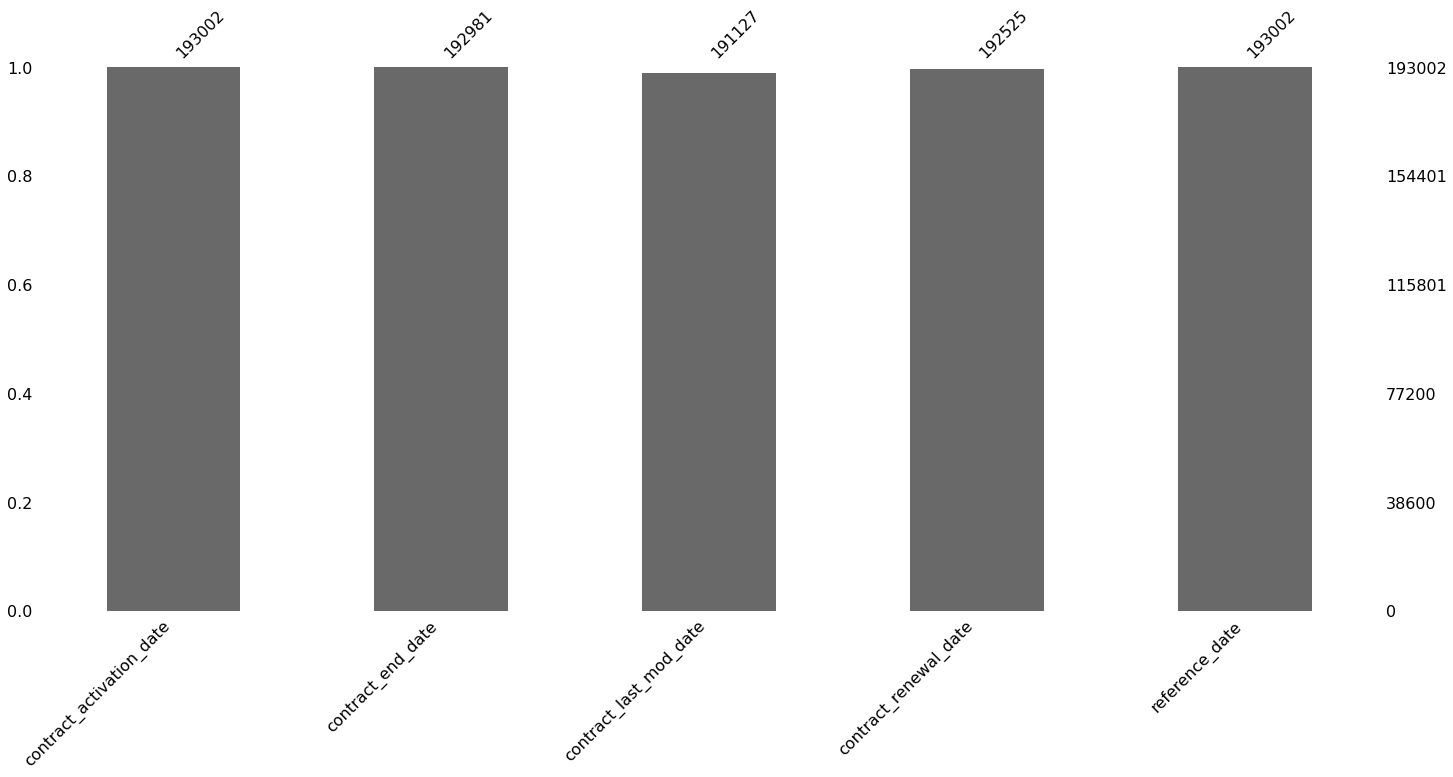

In [27]:
msno.bar(train_data[date_features])

<AxesSubplot:>

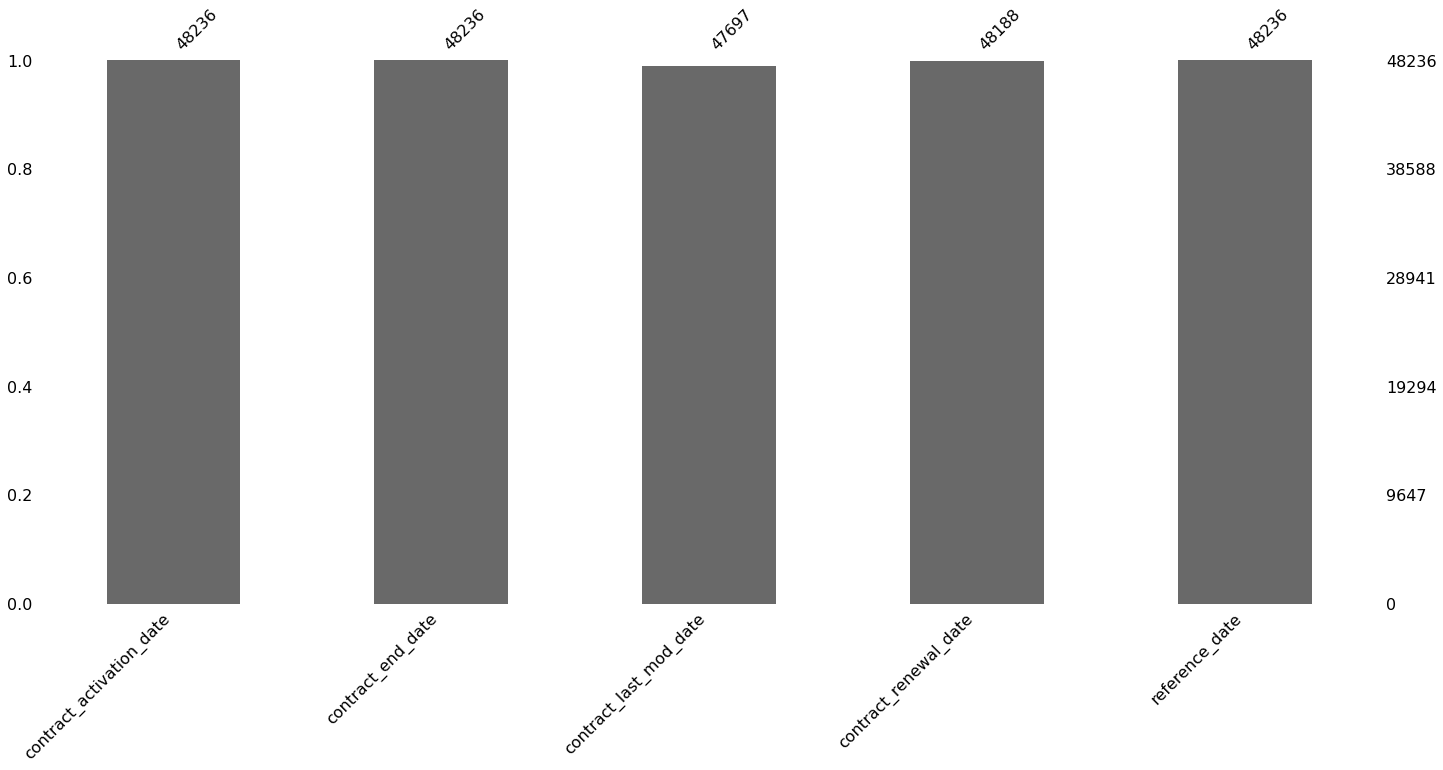

In [28]:
msno.bar(test_data[date_features])

To deal with the missing values in date variables, we are going to replace them with the most common value.

<AxesSubplot:label='3e475161-b52d-4a35-932c-7b2f9a0eaf2e'>

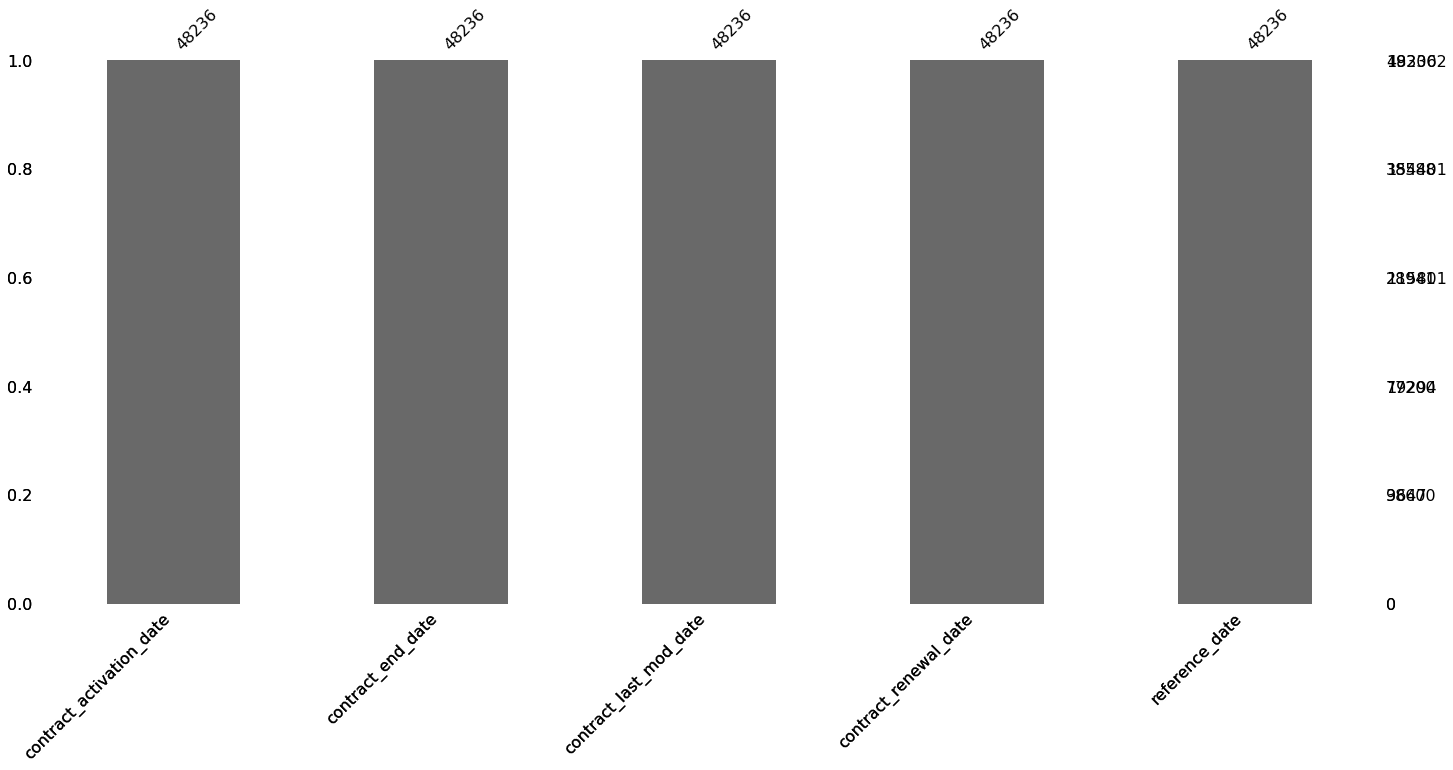

In [19]:
for c in date_features:
    train_data[c] = train_data[c].fillna(train_data[c].mode()[0])
    test_data[c] = test_data[c].fillna(test_data[c].mode()[0])
msno.bar(train_data[date_features])
msno.bar(test_data[date_features])

**Note:** We don't have any missing values in date columns

### Categorical Data
We are going to transform the object variables in categorical data in order to be able to feed them in the algorithm. 
As we can see there are 5 object variabables:

- contract_id
- channel
- client_got_gas
- code_elect_campaign_first_subs

We are not going to change the contract_id as we need to have an identifier for the clients.

To convert them in numerical variables we can encode them with Integer or One - Hot Encoding. 

Due to the reason that those are categorical variables where no such ordinal relationship exists, the integer encoding will not be enough as the model might assume a natural ordering bethween those and that would may result in poor performance. 

For that reason, we are going to use one-hot encoding by creating dummy variables to transform those to numerical data

In [20]:
categorical_data=['client_got_gas', 'code_elect_campaign_first_subs']
train_data[categorical_data]

,client_got_gas,code_elect_campaign_first_subs
0,f,lxidpiddsbxsbosboudacockeimpuepw
1,f,lxidpiddsbxsbosboudacockeimpuepw
2,f,lxidpiddsbxsbosboudacockeimpuepw
3,f,lxidpiddsbxsbosboudacockeimpuepw
4,f,lxidpiddsbxsbosboudacockeimpuepw
...,...,...
192997,f,lxidpiddsbxsbosboudacockeimpuepw
192998,f,lxidpiddsbxsbosboudacockeimpuepw
192999,f,lxidpiddsbxsbosboudacockeimpuepw
193000,f,lxidpiddsbxsbosboudacockeimpuepw


In [31]:
test_data[categorical_data]

,client_got_gas,code_elect_campaign_first_subs
0,f,lxidpiddsbxsbosboudacockeimpuepw
1,f,lxidpiddsbxsbosboudacockeimpuepw
2,f,lxidpiddsbxsbosboudacockeimpuepw
3,f,lxidpiddsbxsbosboudacockeimpuepw
4,f,lxidpiddsbxsbosboudacockeimpuepw
...,...,...
48231,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
48232,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
48233,f,kamkkxfxxuwbdslkwifmmcsiusiuosws
48234,f,kamkkxfxxuwbdslkwifmmcsiusiuosws


<AxesSubplot:>

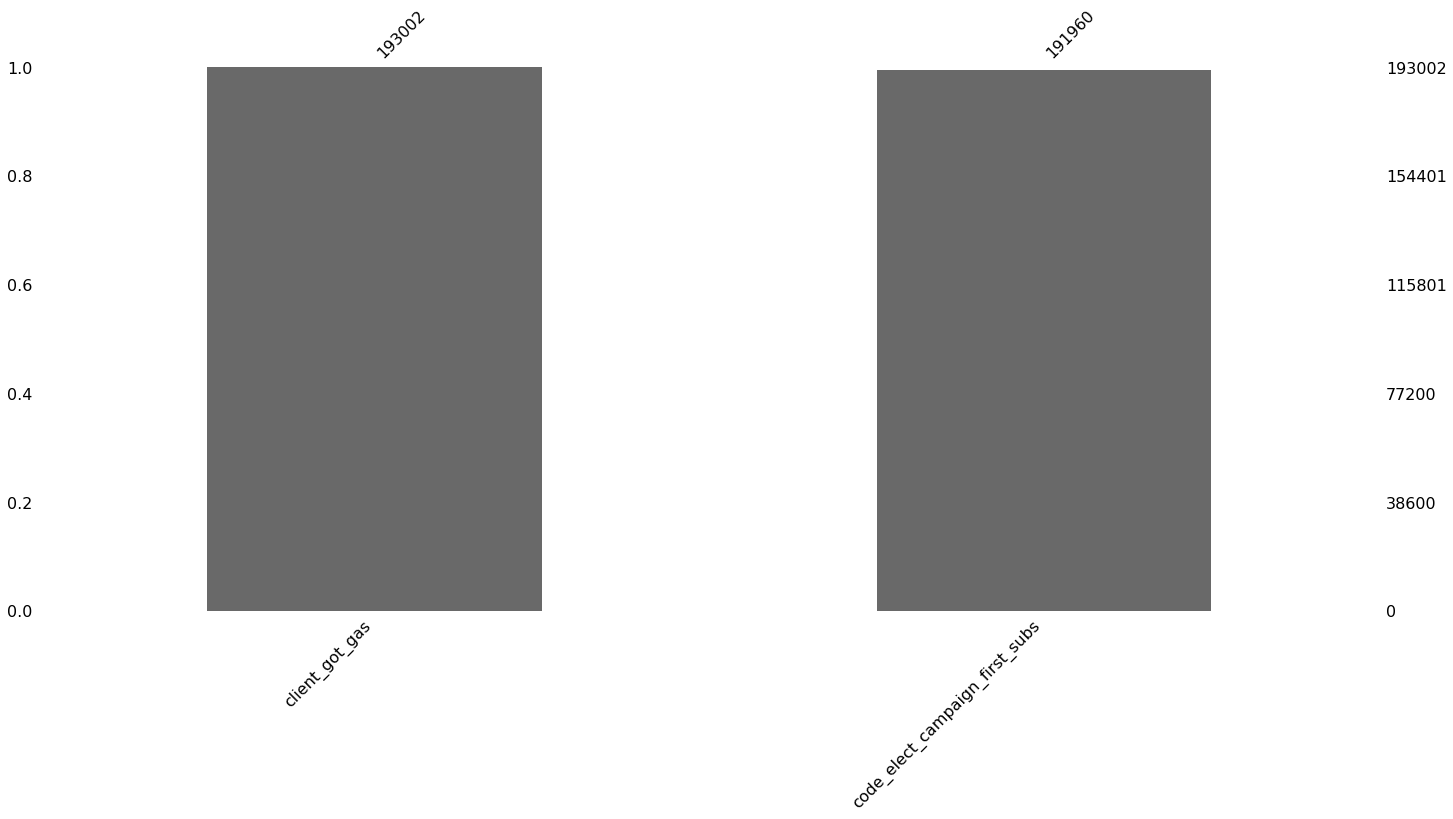

In [32]:
# plot number of non missing values in those 3 categorical features
msno.bar(train_data[categorical_data])

<AxesSubplot:>

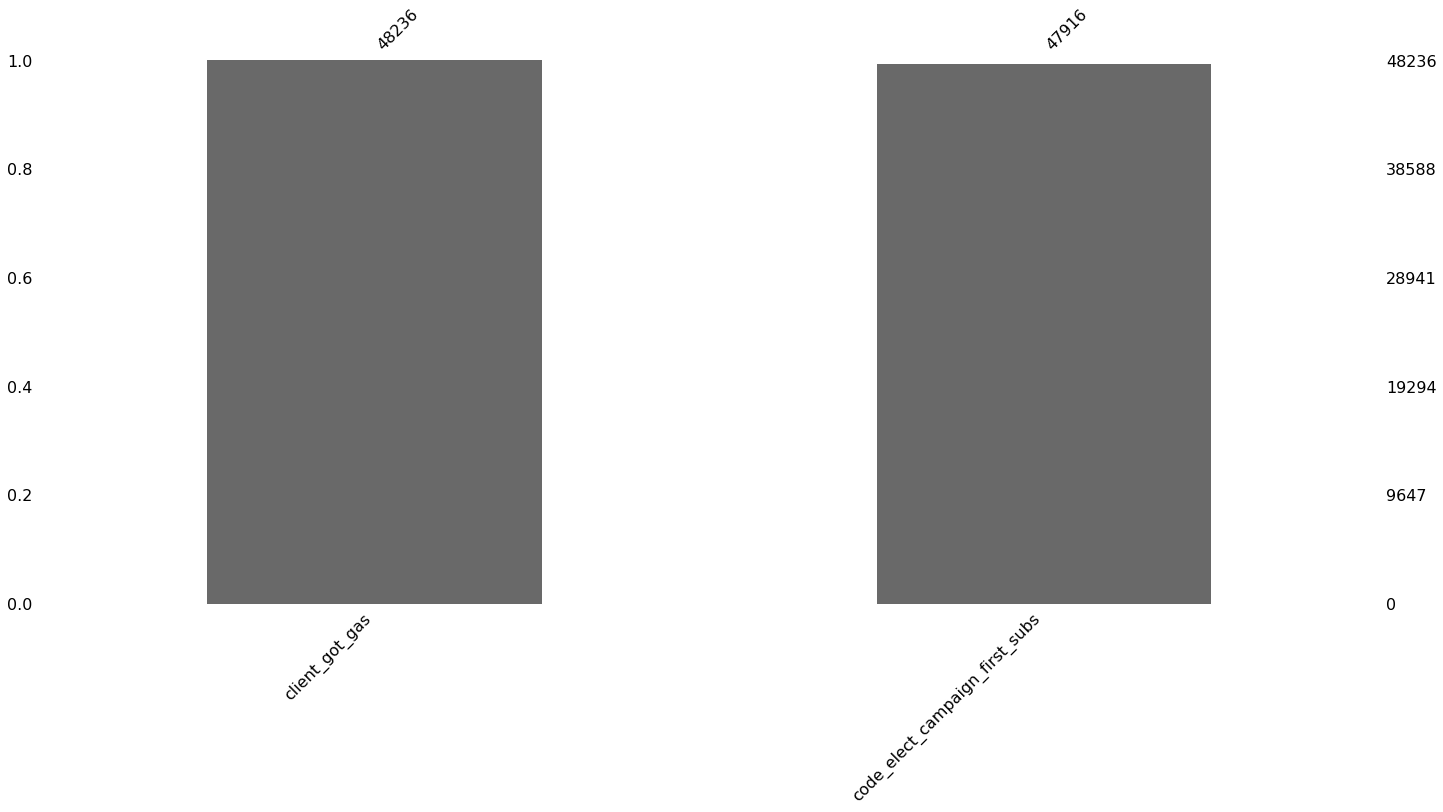

In [33]:
msno.bar(test_data[categorical_data])

### code_elect_campaign_first_subs

In [21]:
train_data['code_elect_campaign_first_subs'].isnull().sum()

1042

In [22]:
test_data['code_elect_campaign_first_subs'].isnull().sum()

320

Once again, there are not so many missing values. So we'll use dummy variables to transform that var into numerical variable

In [23]:
# replace NaN values with string
train_data['code_elect_campaign_first_subs'] = train_data['code_elect_campaign_first_subs'].fillna('null_value')
train_data['code_elect_campaign_first_subs'].isnull().sum()

0

In [24]:
# replace NaN values with string
test_data['code_elect_campaign_first_subs'] = test_data['code_elect_campaign_first_subs'].fillna('null_value')
test_data['code_elect_campaign_first_subs'].isnull().sum()

0

In [25]:
train_data['code_elect_campaign_first_subs'] = train_data['code_elect_campaign_first_subs'].astype("category")
train_data.info()
train_data['code_elect_campaign_first_subs'].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   contract_id                      193002 non-null  object        
 1   elect_cons_at_12m                193002 non-null  int64         
 2   gas_cons_at_12m                  193002 non-null  int64         
 3   elect_cons_last_month            193002 non-null  int64         
 4   contract_activation_date         193002 non-null  datetime64[ns]
 5   contract_end_date                193002 non-null  datetime64[ns]
 6   contract_last_mod_date           193002 non-null  datetime64[ns]
 7   contract_renewal_date            193002 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m       193002 non-null  float64       
 9   fcst_consumption_elect_cal_year  193002 non-null  float64       
 10  fcst_current_discount            191495 non-

6

In [26]:
test_data['code_elect_campaign_first_subs'] = test_data['code_elect_campaign_first_subs'].astype("category")
test_data.info()
test_data['code_elect_campaign_first_subs'].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48236 entries, 0 to 48235
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   contract_id                      48236 non-null  object        
 1   elect_cons_at_12m                48236 non-null  int64         
 2   gas_cons_at_12m                  48236 non-null  int64         
 3   elect_cons_last_month            48236 non-null  int64         
 4   contract_activation_date         48236 non-null  datetime64[ns]
 5   contract_end_date                48236 non-null  datetime64[ns]
 6   contract_last_mod_date           48236 non-null  datetime64[ns]
 7   contract_renewal_date            48236 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m       48236 non-null  float64       
 9   fcst_consumption_elect_cal_year  48236 non-null  float64       
 10  fcst_current_discount            47948 non-null  float64  

5

**IMPORTANT NOTE** 

we will not be able to apply one-hot encoding with not equal number of unique values of code_elect_campaign_first_subs in both datasets. Let's drop also this feature and see how well the model is going to perform.

In [27]:
train_data = train_data.drop(['code_elect_campaign_first_subs'], axis=1)
test_data = test_data.drop(['code_elect_campaign_first_subs'], axis=1)

In [28]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   contract_id                      193002 non-null  object        
 1   elect_cons_at_12m                193002 non-null  int64         
 2   gas_cons_at_12m                  193002 non-null  int64         
 3   elect_cons_last_month            193002 non-null  int64         
 4   contract_activation_date         193002 non-null  datetime64[ns]
 5   contract_end_date                193002 non-null  datetime64[ns]
 6   contract_last_mod_date           193002 non-null  datetime64[ns]
 7   contract_renewal_date            193002 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m       193002 non-null  float64       
 9   fcst_consumption_elect_cal_year  193002 non-null  float64       
 10  fcst_current_discount            191495 non-

## client_got_gas 
As we noticed, client_got_gas has 2 unique values: 

- f: for those that are not gas clients
- t: for those that are gas clients 

We'll replace them with 0 and 1.

In [29]:
train_data["client_got_gas"].nunique()

2

In [30]:
test_data["client_got_gas"].nunique()

2

In [31]:
train_data["client_got_gas"].values

array(['f', 'f', 'f', ..., 'f', 'f', 'f'], dtype=object)

In [32]:
test_data["client_got_gas"].values

array(['f', 'f', 'f', ..., 'f', 'f', 'f'], dtype=object)

In [33]:
train_data["client_got_gas"]=train_data["client_got_gas"].replace(["t", "f"],[1,0])
print(train_data["client_got_gas"].unique())

test_data["client_got_gas"]=test_data["client_got_gas"].replace(["t", "f"],[1,0])
print(test_data["client_got_gas"].unique())

[0 1]
[0 1]


In [34]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   contract_id                      193002 non-null  object        
 1   elect_cons_at_12m                193002 non-null  int64         
 2   gas_cons_at_12m                  193002 non-null  int64         
 3   elect_cons_last_month            193002 non-null  int64         
 4   contract_activation_date         193002 non-null  datetime64[ns]
 5   contract_end_date                193002 non-null  datetime64[ns]
 6   contract_last_mod_date           193002 non-null  datetime64[ns]
 7   contract_renewal_date            193002 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m       193002 non-null  float64       
 9   fcst_consumption_elect_cal_year  193002 non-null  float64       
 10  fcst_current_discount            191495 non-

We have succesfully transform all data types!

In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   contract_id                      193002 non-null  object        
 1   elect_cons_at_12m                193002 non-null  int64         
 2   gas_cons_at_12m                  193002 non-null  int64         
 3   elect_cons_last_month            193002 non-null  int64         
 4   contract_activation_date         193002 non-null  datetime64[ns]
 5   contract_end_date                193002 non-null  datetime64[ns]
 6   contract_last_mod_date           193002 non-null  datetime64[ns]
 7   contract_renewal_date            193002 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m       193002 non-null  float64       
 9   fcst_consumption_elect_cal_year  193002 non-null  float64       
 10  fcst_current_discount            191495 non-

In [66]:
train_data.head()

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,...,customer_antiquity_in_years,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,has_churned_over_next_3m
0,d07d473503c6bef7cf1922fab1f88f3e,1577,0,0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.0,...,6,13.009751,2015-03-01,0.135813,0.0,0.0,39.926856,0.0,0.0,1
1,d07d473503c6bef7cf1922fab1f88f3e,1577,0,0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.0,...,6,13.009751,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN,1
2,d07d473503c6bef7cf1922fab1f88f3e,1577,0,0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.0,...,6,13.009751,2015-05-01,0.135813,0.0,0.0,39.926856,0.0,0.0,1
3,d07d473503c6bef7cf1922fab1f88f3e,1577,0,0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.0,...,6,13.009751,2015-07-01,0.135813,0.0,0.0,39.926855,0.0,0.0,1
4,d07d473503c6bef7cf1922fab1f88f3e,1577,0,0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.0,...,6,13.009751,2015-12-01,0.130619,0.0,0.0,40.087205,0.0,0.0,1


## Missing Values

### Search & Clear Missing Values
Let's see what we can do with the rest of the missing values

<AxesSubplot:>

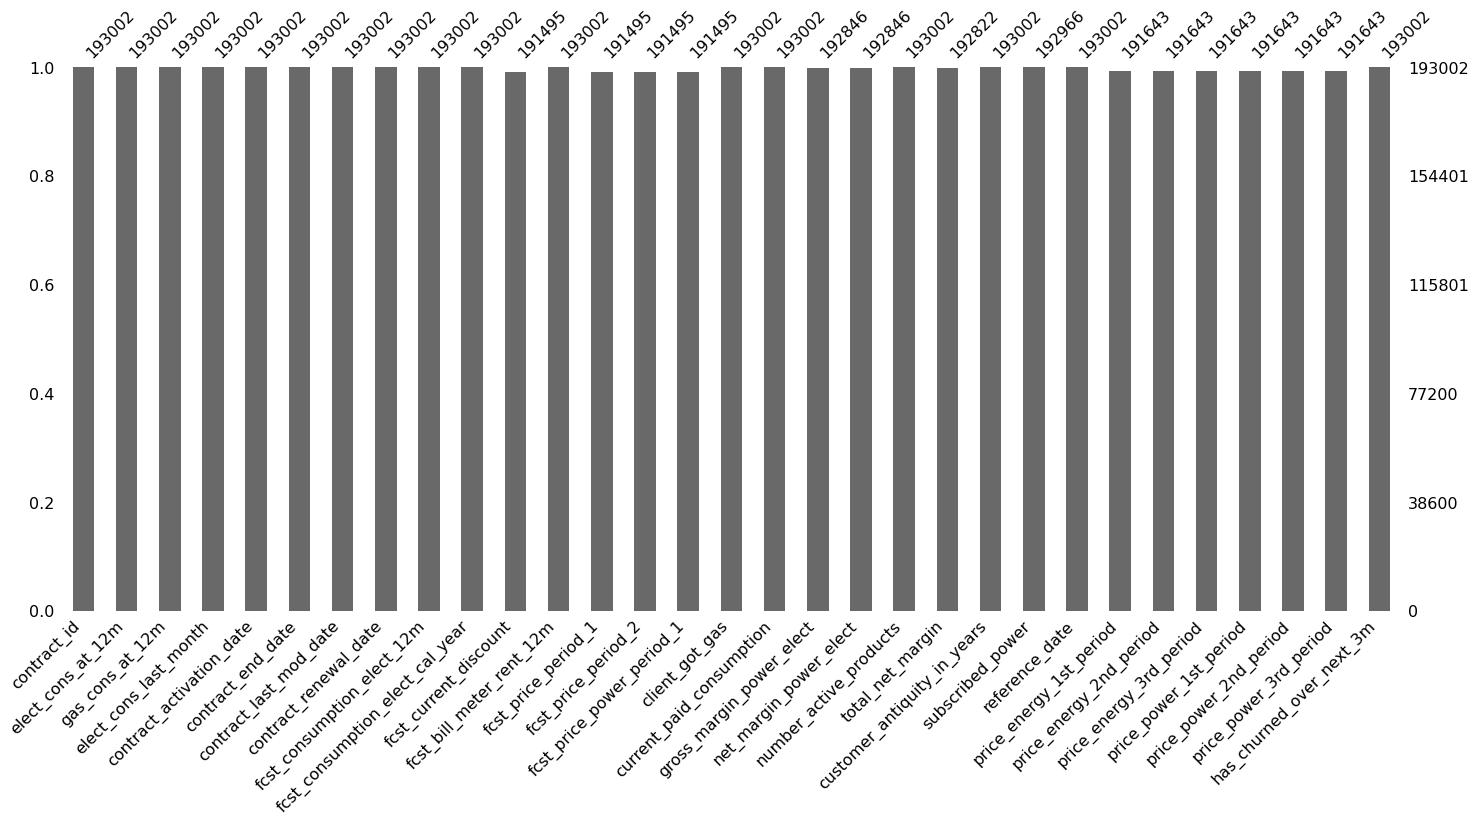

In [67]:
msno.bar(train_data)

<AxesSubplot:>

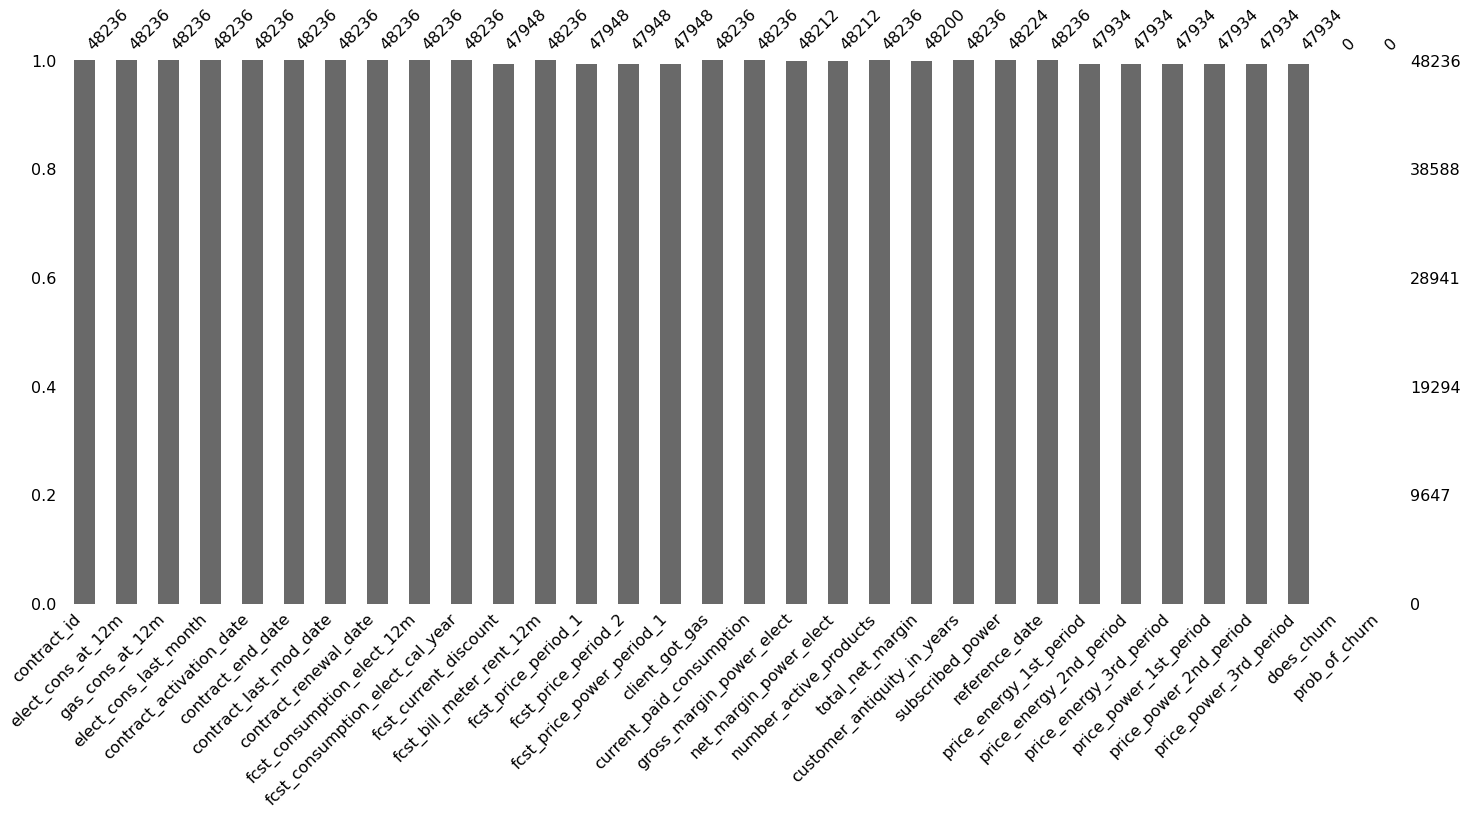

In [68]:
msno.bar(test_data)

There are still some missing values on both datasets but before clearing them, we have to manage the negative values.

## Negative Values

In [35]:
# make a list with the features that have negative values
ls_neg_values=[]
for feat in train_data.columns:
    if (feat!='contract_id') and not (feat.endswith('date')) and (train_data[feat] < 0).values.any():
        ls_neg_values.append(feat)
        print(f' {feat} has {((train_data[feat] < 0).values.sum())} negative values')

 elect_cons_at_12m has 323 negative values
 gas_cons_at_12m has 72 negative values
 elect_cons_last_month has 552 negative values
 fcst_consumption_elect_12m has 491 negative values
 fcst_consumption_elect_cal_year has 300 negative values
 fcst_bill_meter_rent_12m has 48 negative values
 fcst_price_power_period_1 has 12 negative values
 current_paid_consumption has 324 negative values
 gross_margin_power_elect has 13648 negative values
 net_margin_power_elect has 14223 negative values
 total_net_margin has 1164 negative values
 price_power_1st_period has 10 negative values
 price_power_2nd_period has 9 negative values
 price_power_3rd_period has 9 negative values


In [36]:
for feat in ls_neg_values:
    train_data.loc[train_data[feat]<0,feat] =train_data[feat].median()

In [37]:
# make a list with the features that have negative values on test dataset
ls_neg_values_test=[]
for feat in test_data.columns:
    if (feat!='contract_id') and not (feat.endswith('date')) and (test_data[feat] < 0).values.any():
        ls_neg_values.append(feat)
        print(f' {feat} has {((test_data[feat] < 0).values.sum())} negative values')

 elect_cons_at_12m has 120 negative values
 gas_cons_at_12m has 12 negative values
 elect_cons_last_month has 96 negative values
 fcst_consumption_elect_12m has 132 negative values
 fcst_consumption_elect_cal_year has 83 negative values
 fcst_bill_meter_rent_12m has 24 negative values
 current_paid_consumption has 83 negative values
 gross_margin_power_elect has 3174 negative values
 net_margin_power_elect has 3414 negative values
 total_net_margin has 405 negative values
 price_power_1st_period has 3 negative values
 price_power_2nd_period has 3 negative values
 price_power_3rd_period has 3 negative values


As there are not many of them, we are going to replace them with the median of the corresponding feature

In [38]:
for feat in ls_neg_values_test:
    test_data.loc[test_data[feat]<0,feat] =test_data[feat].median()

In [39]:
for feat in ls_neg_values:
    print(f' {feat} has {((train_data[feat] < 0).values.sum())} negative values')
print('\n')
for feat in ls_neg_values_test:
    print(f' {feat} has {((test_data[feat] < 0).values.sum())} negative values')

 elect_cons_at_12m has 0 negative values
 gas_cons_at_12m has 0 negative values
 elect_cons_last_month has 0 negative values
 fcst_consumption_elect_12m has 0 negative values
 fcst_consumption_elect_cal_year has 0 negative values
 fcst_bill_meter_rent_12m has 0 negative values
 fcst_price_power_period_1 has 0 negative values
 current_paid_consumption has 0 negative values
 gross_margin_power_elect has 0 negative values
 net_margin_power_elect has 0 negative values
 total_net_margin has 0 negative values
 price_power_1st_period has 0 negative values
 price_power_2nd_period has 0 negative values
 price_power_3rd_period has 0 negative values
 elect_cons_at_12m has 0 negative values
 gas_cons_at_12m has 0 negative values
 elect_cons_last_month has 0 negative values
 fcst_consumption_elect_12m has 0 negative values
 fcst_consumption_elect_cal_year has 0 negative values
 fcst_bill_meter_rent_12m has 0 negative values
 current_paid_consumption has 0 negative values
 gross_margin_power_elect h

## Back to the missing values!

In [40]:
# make a list with the features that have missing values
ls_feat_missing_values=[]
for feat in train_data.columns:
    if train_data[feat].isnull().sum() !=0:
        ls_feat_missing_values.append(feat)
print(ls_feat_missing_values)

['fcst_current_discount', 'fcst_price_period_1', 'fcst_price_period_2', 'fcst_price_power_period_1', 'gross_margin_power_elect', 'net_margin_power_elect', 'total_net_margin', 'subscribed_power', 'price_energy_1st_period', 'price_energy_2nd_period', 'price_energy_3rd_period', 'price_power_1st_period', 'price_power_2nd_period', 'price_power_3rd_period']


In [41]:
train_data[ls_feat_missing_values].isnull().sum()/len(train_data)

fcst_current_discount        0.007808
fcst_price_period_1          0.007808
fcst_price_period_2          0.007808
fcst_price_power_period_1    0.007808
gross_margin_power_elect     0.000808
net_margin_power_elect       0.000808
total_net_margin             0.000933
subscribed_power             0.000187
price_energy_1st_period      0.007041
price_energy_2nd_period      0.007041
price_energy_3rd_period      0.007041
price_power_1st_period       0.007041
price_power_2nd_period       0.007041
price_power_3rd_period       0.007041
dtype: float64

**Note:** as this is a really small percentage of their samples, we are going to replace those missing values with the median

In [42]:
for c in ls_feat_missing_values:
    train_data[c] = train_data[c].fillna(train_data[c].median())

In [43]:
train_data.isnull().sum().sum()

0

<AxesSubplot:>

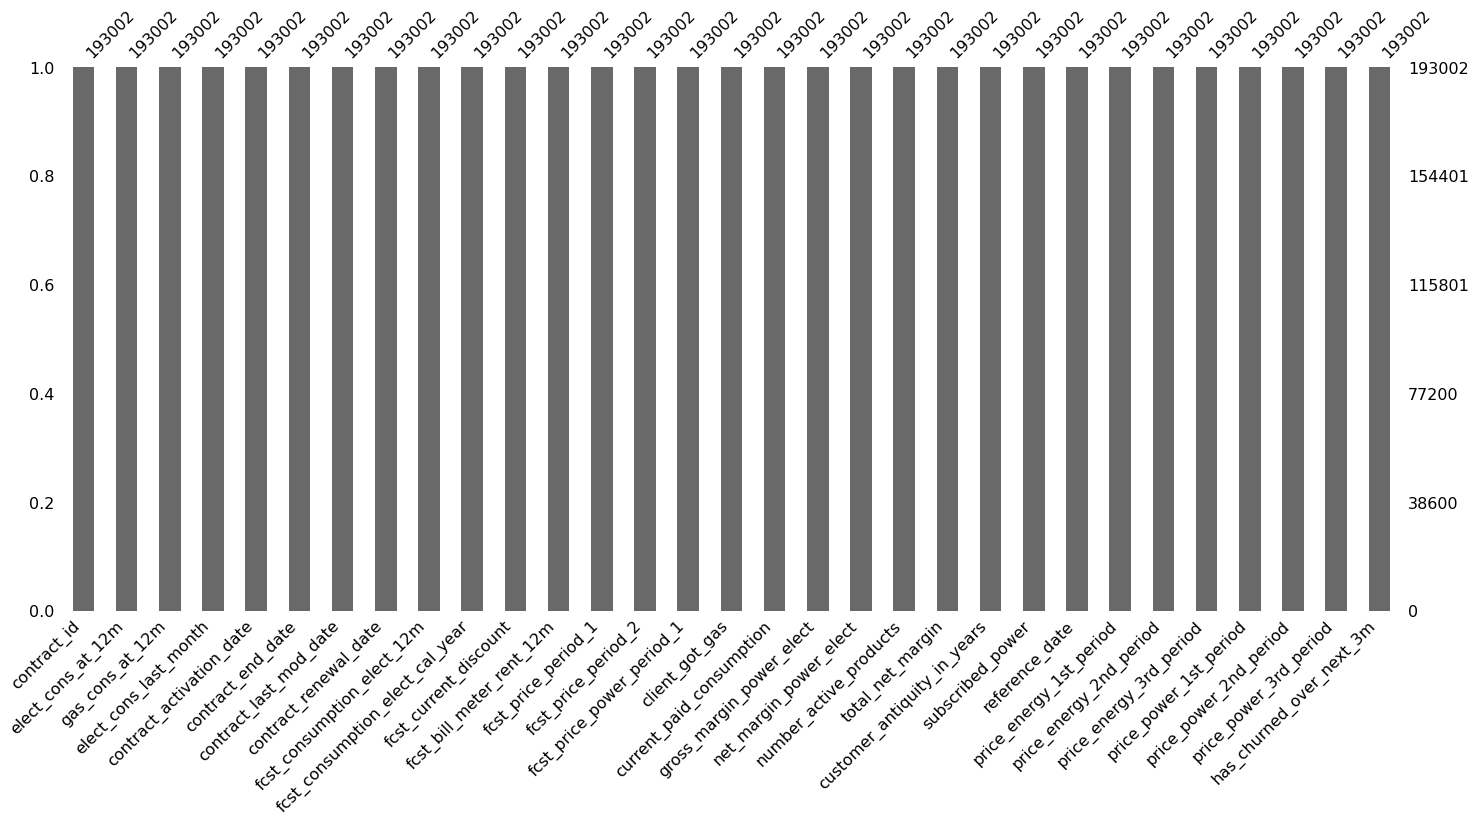

In [44]:
msno.bar(train_data)

In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48236 entries, 0 to 48235
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   contract_id                      48236 non-null  object        
 1   elect_cons_at_12m                48236 non-null  int64         
 2   gas_cons_at_12m                  48236 non-null  int64         
 3   elect_cons_last_month            48236 non-null  int64         
 4   contract_activation_date         48236 non-null  datetime64[ns]
 5   contract_end_date                48236 non-null  datetime64[ns]
 6   contract_last_mod_date           48236 non-null  datetime64[ns]
 7   contract_renewal_date            48236 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m       48236 non-null  float64       
 9   fcst_consumption_elect_cal_year  48236 non-null  float64       
 10  fcst_current_discount            47948 non-null  float64  

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48236 entries, 0 to 48235
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   contract_id                      48236 non-null  object        
 1   elect_cons_at_12m                48236 non-null  int64         
 2   gas_cons_at_12m                  48236 non-null  int64         
 3   elect_cons_last_month            48236 non-null  int64         
 4   contract_activation_date         48236 non-null  datetime64[ns]
 5   contract_end_date                48236 non-null  datetime64[ns]
 6   contract_last_mod_date           48236 non-null  datetime64[ns]
 7   contract_renewal_date            48236 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m       48236 non-null  float64       
 9   fcst_consumption_elect_cal_year  48236 non-null  float64       
 10  fcst_current_discount            47948 non-null  float64  

In [45]:
# make a list with the features that have missing values
ls_feat_missing_values=[]
for feat in test_data.columns:
    if (test_data[feat].isnull().sum() !=0) and (feat!='does_churn') and (feat!='prob_of_churn'):
        ls_feat_missing_values.append(feat)
print(ls_feat_missing_values)

['fcst_current_discount', 'fcst_price_period_1', 'fcst_price_period_2', 'fcst_price_power_period_1', 'gross_margin_power_elect', 'net_margin_power_elect', 'total_net_margin', 'subscribed_power', 'price_energy_1st_period', 'price_energy_2nd_period', 'price_energy_3rd_period', 'price_power_1st_period', 'price_power_2nd_period', 'price_power_3rd_period']


In [46]:
for c in ls_feat_missing_values:
    test_data[c] = test_data[c].fillna(test_data[c].median())

<AxesSubplot:>

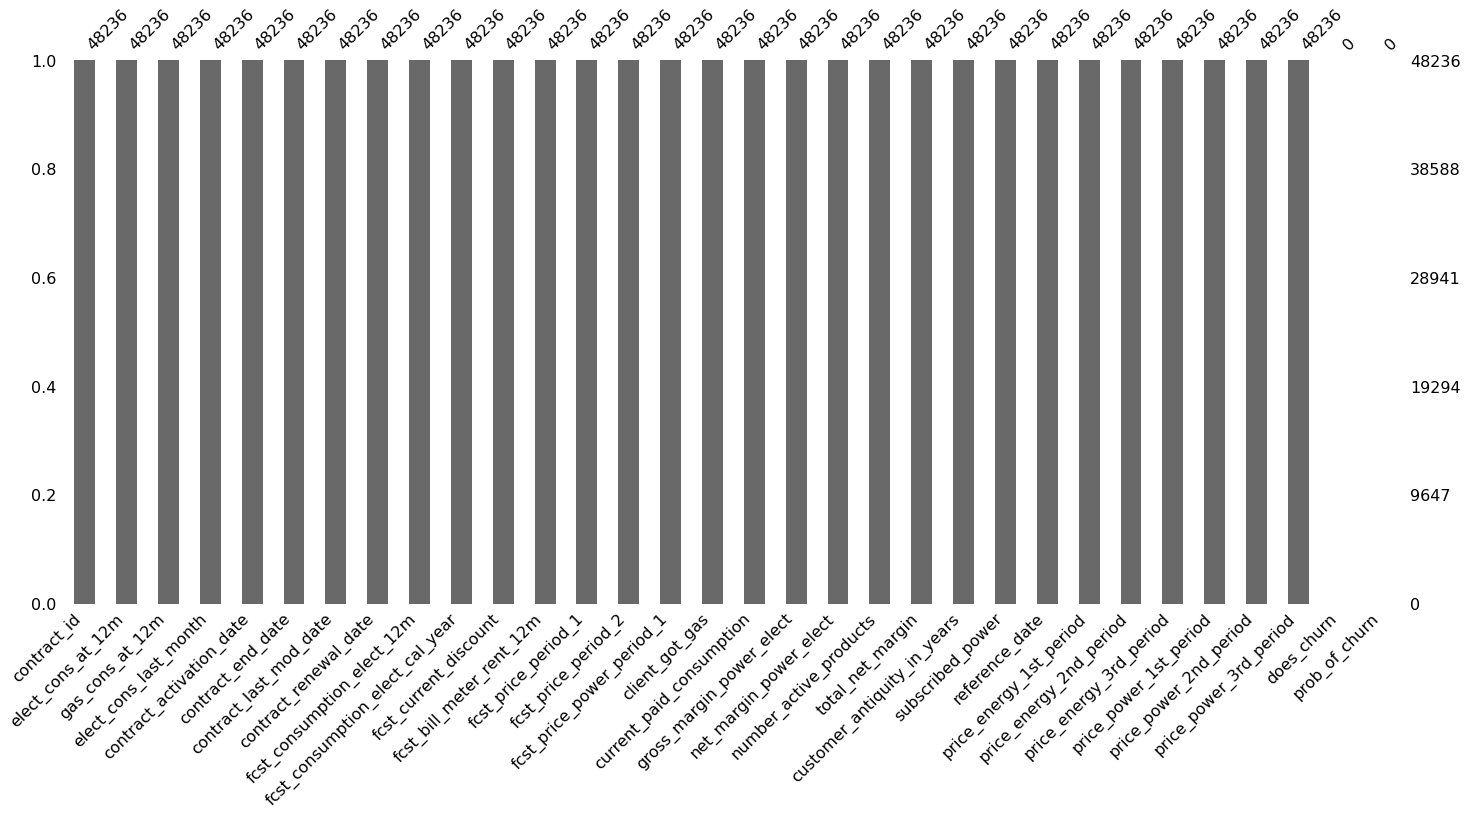

In [47]:
msno.bar(test_data)

**Finally!** , we dont have any missing value in the datasets!

## Deal With Outliers

I am going to replace the outliers with thei median of the corresponding column, using Z score.

In [48]:
import pickle
filename = 'test_data_before_outliers.pickle'
pickle.dump(test_data, open(filename, 'wb'))

In [49]:
train_data_with_outliers = train_data.copy(deep=True)

In [50]:
train_data.describe()

,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,fcst_current_discount,fcst_bill_meter_rent_12m,fcst_price_period_1,fcst_price_period_2,fcst_price_power_period_1,...,total_net_margin,customer_antiquity_in_years,subscribed_power,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,has_churned_over_next_3m
count,1.930020e+05,1.930020e+05,1.930020e+05,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,...,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,2.289174e+05,1.631221e+04,1.462304e+04,1345.307361,1743.899383,0.507211,48.585571,0.171438,0.027269,29.227942,...,109.531768,5.031134,25.792485,0.127510,0.043338,0.038862,39.085823,8.027149,4.858959,0.099009
std,7.981262e+05,9.078547e+04,6.161045e+04,2277.984774,4729.210845,2.650183,54.550996,0.032983,0.024866,3.477735,...,177.541928,1.676171,27.258071,0.022633,0.039604,0.046256,4.879853,9.703946,5.892615,0.298675
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.251901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.981000e+03,0.000000e+00,0.000000e+00,293.001733,0.000000,0.000000,11.212736,0.145307,0.000000,27.257522,...,26.438501,4.000000,15.648757,0.113901,0.000000,0.000000,36.735692,0.000000,0.000000,0.000000
50%,1.800300e+04,0.000000e+00,6.730000e+02,667.007498,343.413309,0.000000,13.428685,0.180165,0.044162,29.744311,...,59.293393,5.000000,17.346335,0.132036,0.067813,0.000000,39.926855,0.000000,0.000000,0.000000
75%,5.897300e+04,0.000000e+00,3.087000e+03,1522.760387,1811.550628,0.000000,90.827998,0.184536,0.050658,29.744311,...,136.498177,6.000000,24.787632,0.137101,0.080656,0.092463,40.087205,18.392143,12.300087,0.000000
max,1.890300e+07,2.141273e+06,3.396121e+06,58725.903411,159328.330681,25.767465,1666.151782,0.345452,0.100446,39.902662,...,12174.122227,16.000000,625.950297,0.253795,0.182288,0.145403,53.616556,27.574100,13.233853,1.000000


In [51]:
def replace_outliers_z_score(dataframe, column, Z=3):

    from scipy.stats import zscore

    df = dataframe.copy(deep=True)
    df.dropna(inplace = True, subset = [column] )
    
    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

    # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [52]:
# let's make a list with the features I'm going to replace outliers with theie mean value.
ls = ['elect_cons_at_12m','gas_cons_at_12m','elect_cons_last_month','fcst_consumption_elect_12m', 'fcst_consumption_elect_cal_year','fcst_current_discount','fcst_bill_meter_rent_12m', 'fcst_price_period_1','fcst_price_period_2','fcst_price_power_period_1','current_paid_consumption', 'gross_margin_power_elect','net_margin_power_elect', 'number_active_products', 'total_net_margin', 'customer_antiquity_in_years','subscribed_power', 'price_energy_1st_period','price_energy_2nd_period', 'price_energy_3rd_period', 'price_power_1st_period', 'price_power_2nd_period','price_power_3rd_period' ]
for c in ls:
        print(c)
        replace_outliers_z_score(train_data,c)
        replace_outliers_z_score(test_data,c)

elect_cons_at_12m
Replaced: 4893  outliers in  elect_cons_at_12m
Replaced: 1152  outliers in  elect_cons_at_12m
gas_cons_at_12m
Replaced: 3369  outliers in  gas_cons_at_12m
Replaced: 900  outliers in  gas_cons_at_12m
elect_cons_last_month
Replaced: 4176  outliers in  elect_cons_last_month
Replaced: 1140  outliers in  elect_cons_last_month
fcst_consumption_elect_12m
Replaced: 3083  outliers in  fcst_consumption_elect_12m
Replaced: 756  outliers in  fcst_consumption_elect_12m
fcst_consumption_elect_cal_year
Replaced: 2340  outliers in  fcst_consumption_elect_cal_year
Replaced: 660  outliers in  fcst_consumption_elect_cal_year
fcst_current_discount
Replaced: 6898  outliers in  fcst_current_discount
Replaced: 1833  outliers in  fcst_current_discount
fcst_bill_meter_rent_12m
Replaced: 4590  outliers in  fcst_bill_meter_rent_12m
Replaced: 983  outliers in  fcst_bill_meter_rent_12m
fcst_price_period_1
Replaced: 3599  outliers in  fcst_price_period_1
Replaced: 888  outliers in  fcst_price_peri

## Compare outliers replacement using boxplots

<AxesSubplot:>

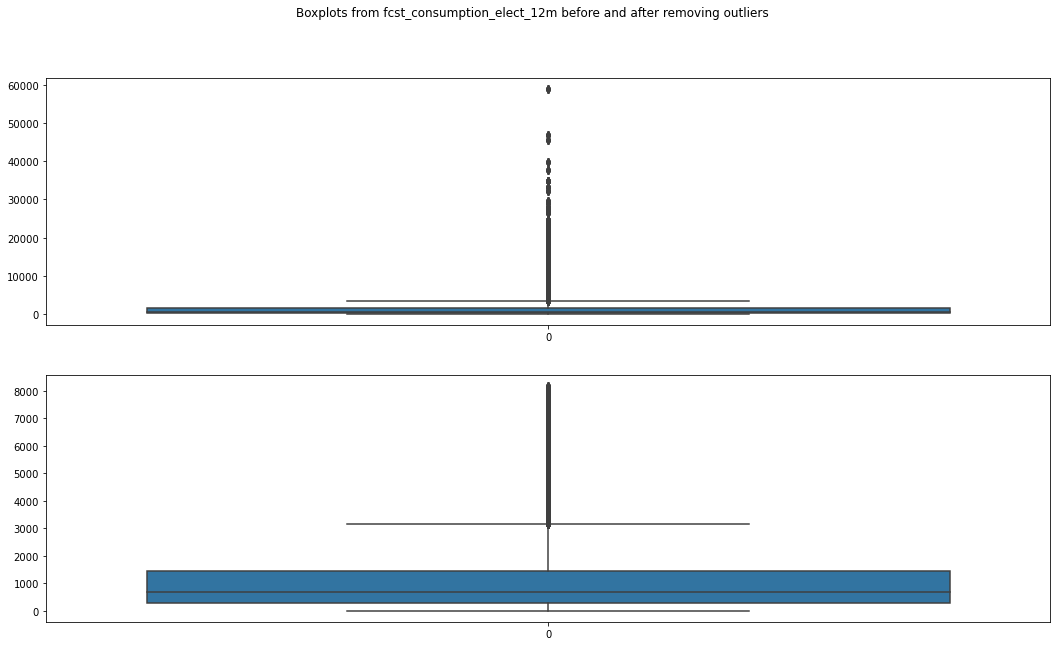

In [89]:
fig, axes = plt.subplots(2, figsize=(18, 10))
fig.suptitle('Boxplots from fcst_consumption_elect_12m before and after removing outliers')
sns.boxplot(ax = axes[0],data=train_data_with_outliers.fcst_consumption_elect_12m)
sns.boxplot(ax = axes[1],data= train_data.fcst_consumption_elect_12m)

<AxesSubplot:>

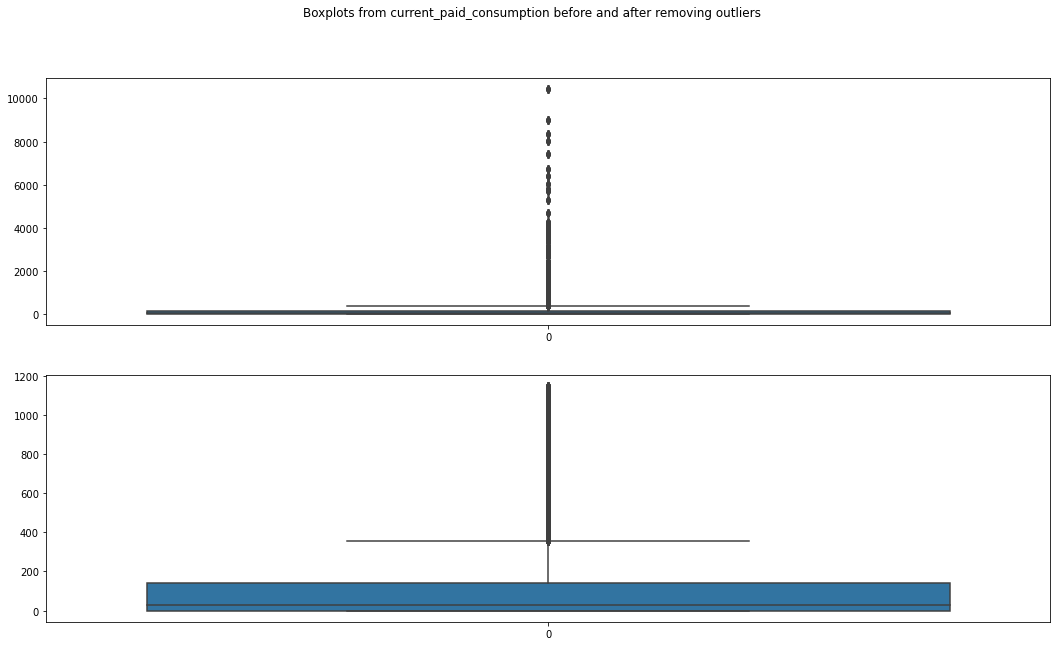

In [90]:
fig, axes = plt.subplots(2, figsize=(18, 10))
fig.suptitle('Boxplots from current_paid_consumption before and after removing outliers')
sns.boxplot(ax = axes[0],data=train_data_with_outliers.current_paid_consumption)
sns.boxplot(ax = axes[1],data= train_data.current_paid_consumption)

<AxesSubplot:>

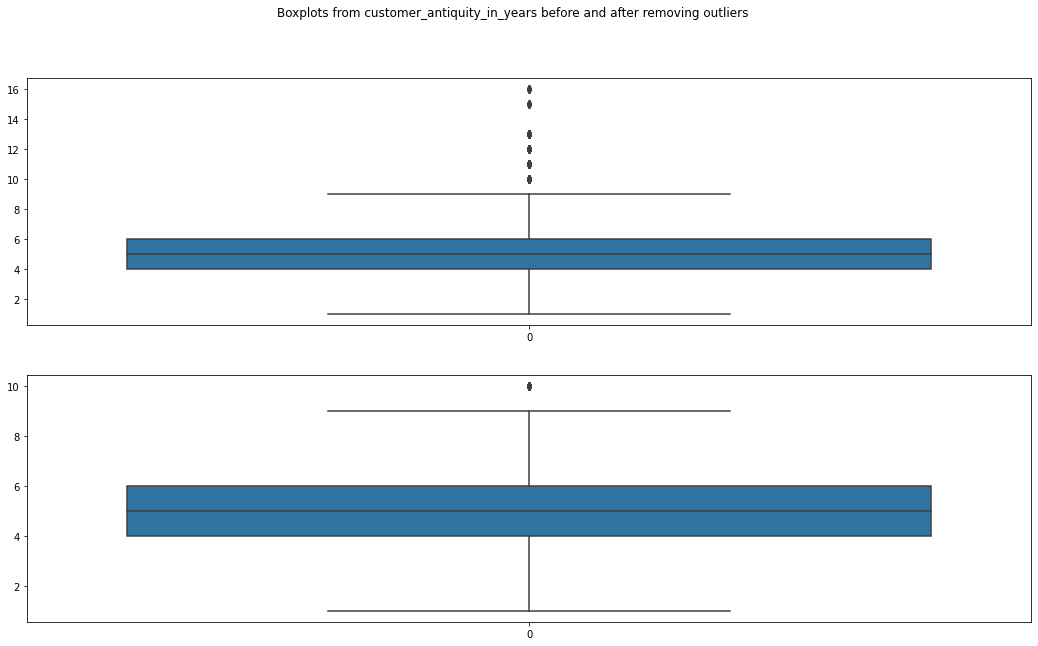

In [91]:
fig, axes = plt.subplots(2, figsize=(18, 10))
fig.suptitle('Boxplots from customer_antiquity_in_years before and after removing outliers')
sns.boxplot(ax = axes[0],data=train_data_with_outliers.customer_antiquity_in_years)
sns.boxplot(ax = axes[1],data= train_data.customer_antiquity_in_years)

**Note** The plots above, confirm the replacement of the outliers!

## Data Visualization

In [55]:
clean_data = train_data

Let's how many samples has each class of the target values has_churned_over_next_3m

<AxesSubplot:xlabel='has_churned_over_next_3m', ylabel='count'>

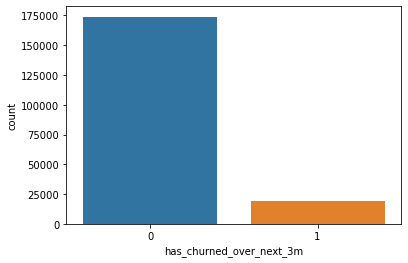

In [93]:
sns.countplot(x='has_churned_over_next_3m', data= clean_data)

In [53]:
count_not_churned = train_data['has_churned_over_next_3m'].value_counts()[0]
count_churned = train_data['has_churned_over_next_3m'].value_counts()[1]
print(f'{round(count_not_churned/len(train_data)*100,2)} % has not churned \n  {round(count_churned/len(train_data)*100,2)}% has churned ')

90.1 % has not churned 
  9.9% has churned 


We see that the dataset is highly imbalanced. We have to keep that in mind later on training/test process by using the appropiate metric. 
- The **F-Measure** is a popular metric for imbalanced classification.  
- **Accuracy** is almost universally inappropriate for imbalanced classification. The reason is, a high accuracy (or low error) is achievable by a no skill model that only predicts the majority class.

In [56]:
# remove the zscore feature from the datasets
clean_data= clean_data.drop(['zscore'],axis=1)
test_data= test_data.drop(['zscore'],axis=1)

In [57]:
# trained data with removed outliers
clean_data

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_consumption_elect_cal_year,...,customer_antiquity_in_years,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,has_churned_over_next_3m
0,d07d473503c6bef7cf1922fab1f88f3e,1577.0,0.0,0.0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.000000,...,6.0,13.009751,2015-03-01,0.135813,0.000000,0.000000,39.926856,0.000000,0.000000,1
1,d07d473503c6bef7cf1922fab1f88f3e,1577.0,0.0,0.0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.000000,...,6.0,13.009751,2015-06-01,0.132036,0.067813,0.000000,39.926855,0.000000,0.000000,1
2,d07d473503c6bef7cf1922fab1f88f3e,1577.0,0.0,0.0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.000000,...,6.0,13.009751,2015-05-01,0.135813,0.000000,0.000000,39.926856,0.000000,0.000000,1
3,d07d473503c6bef7cf1922fab1f88f3e,1577.0,0.0,0.0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.000000,...,6.0,13.009751,2015-07-01,0.135813,0.000000,0.000000,39.926855,0.000000,0.000000,1
4,d07d473503c6bef7cf1922fab1f88f3e,1577.0,0.0,0.0,2010-01-05,2016-12-12,2015-11-01,2015-12-14,113.189528,0.000000,...,6.0,13.009751,2015-12-01,0.130619,0.000000,0.000000,40.087205,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,5844cbd329236f04d75b25d68a7ab279,119112.0,0.0,2311.0,2012-10-24,2016-10-22,2015-10-22,2014-12-19,2922.238272,2807.267523,...,3.0,43.816521,2015-03-01,0.115269,0.083503,0.093272,36.735692,18.466007,12.349485,1
192998,5844cbd329236f04d75b25d68a7ab279,119112.0,0.0,2311.0,2012-10-24,2016-10-22,2015-10-22,2014-12-19,2922.238272,2807.267523,...,3.0,43.816521,2015-11-01,0.103231,0.077520,0.089385,36.735692,18.466007,12.349485,1
192999,5844cbd329236f04d75b25d68a7ab279,119112.0,0.0,2311.0,2012-10-24,2016-10-22,2015-10-22,2014-12-19,2922.238272,2807.267523,...,3.0,43.816521,2015-01-01,0.115269,0.083503,0.093272,36.735692,18.466007,12.349485,1
193000,5844cbd329236f04d75b25d68a7ab279,119112.0,0.0,2311.0,2012-10-24,2016-10-22,2015-10-22,2014-12-19,2922.238272,2807.267523,...,3.0,43.816521,2015-09-01,0.108415,0.080656,0.093942,36.735692,18.466007,12.349485,1


In [59]:
# test data with removed outlier
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48236 entries, 0 to 48235
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   contract_id                      48236 non-null  object        
 1   elect_cons_at_12m                48236 non-null  float64       
 2   gas_cons_at_12m                  48236 non-null  float64       
 3   elect_cons_last_month            48236 non-null  float64       
 4   contract_activation_date         48236 non-null  datetime64[ns]
 5   contract_end_date                48236 non-null  datetime64[ns]
 6   contract_last_mod_date           48236 non-null  datetime64[ns]
 7   contract_renewal_date            48236 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m       48236 non-null  float64       
 9   fcst_consumption_elect_cal_year  48236 non-null  float64       
 10  fcst_current_discount            48236 non-null  float64  

## Correlation examination
Let's see if there are any pair of features that are highly correlated to deal with the problem of multicollinearity.

<AxesSubplot:>

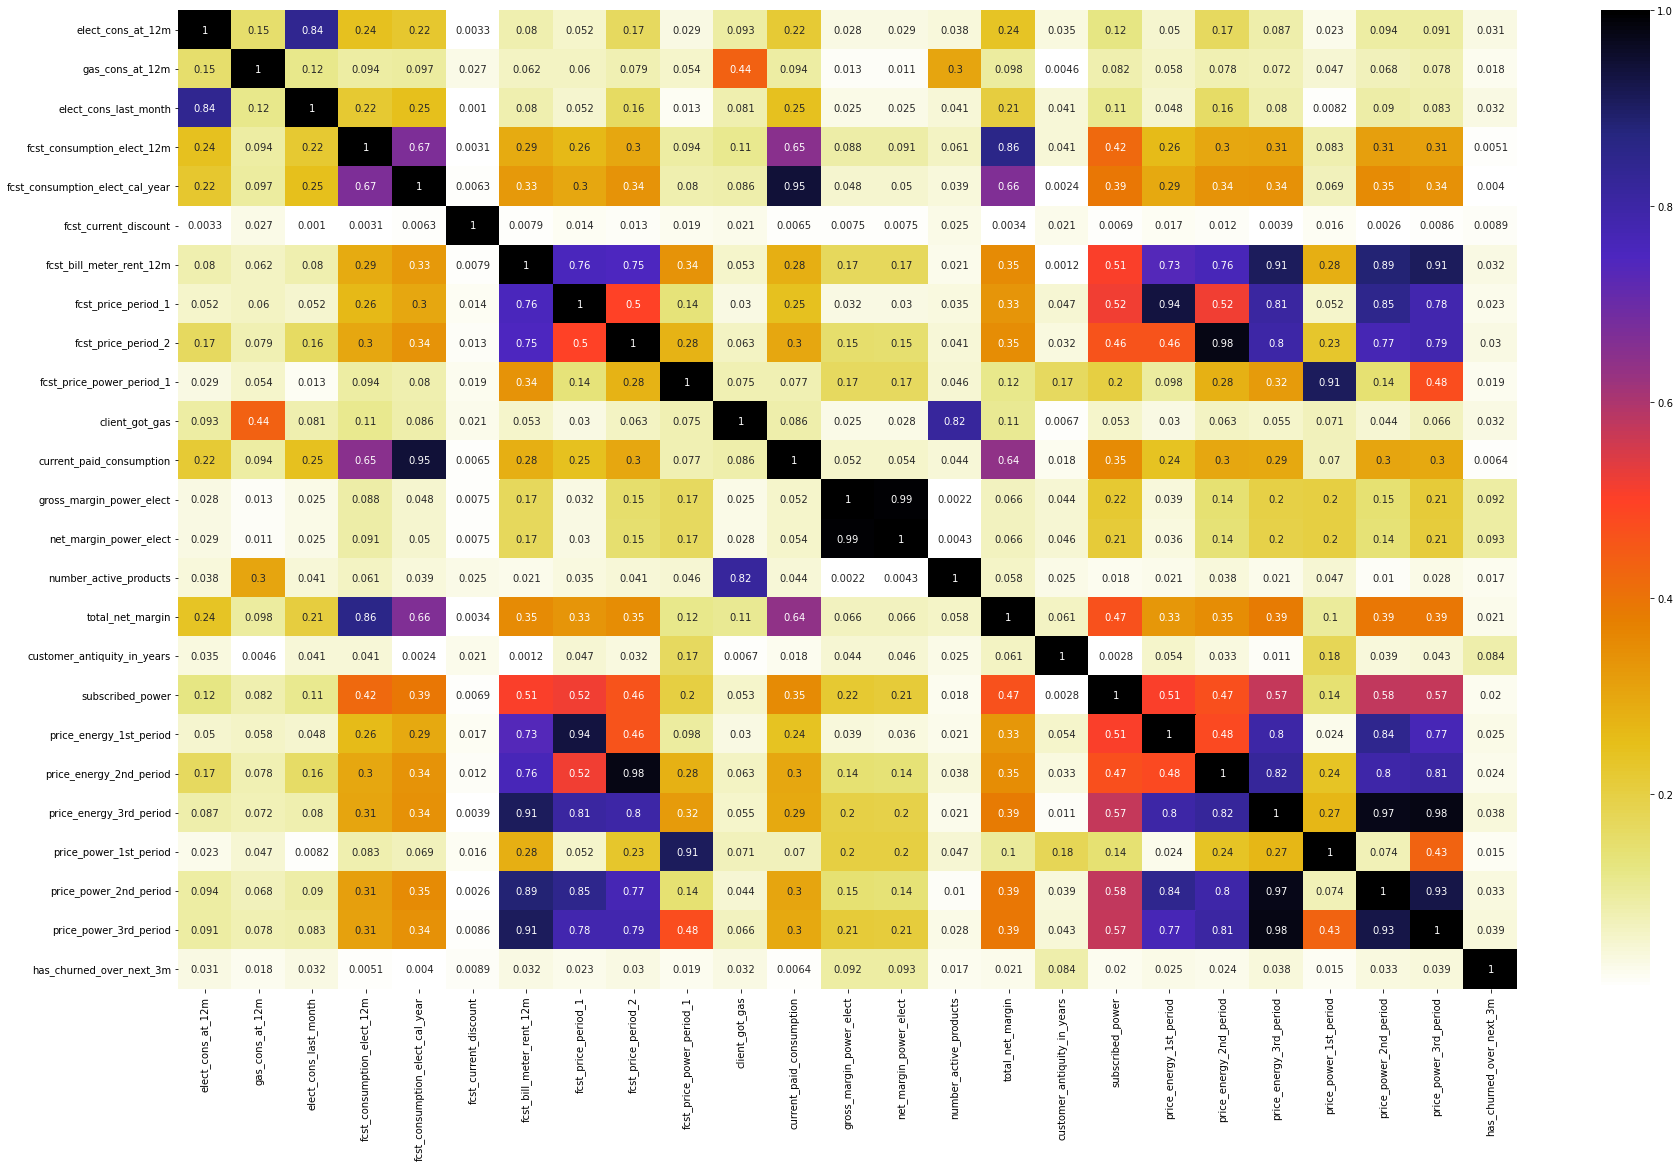

In [99]:
plt.figure(figsize=(30,18))
sns.heatmap(clean_data.iloc[:,1:].corr().abs(), annot=True, cmap=plt.cm.CMRmap_r)

In [61]:
def print_highly_correlated(df, features, threshold=0.5):
    """Prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
    corr_df = df[features].corr() # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    most_correlated =[]
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            cols = df[features].columns
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))
            most_correlated.append(corr_df.index[i])
            most_correlated.append(corr_df.index[j])
    return most_correlated

In [62]:
# find the features that have a correlation > 90%
most_corr = print_highly_correlated(clean_data,clean_data.columns[1:], threshold=0.9)

gross_margin_power_elect and net_margin_power_elect = 0.992
price_energy_3rd_period and price_power_3rd_period = 0.980
fcst_price_period_2 and price_energy_2nd_period = 0.980
price_energy_3rd_period and price_power_2nd_period = 0.974
fcst_consumption_elect_cal_year and current_paid_consumption = 0.945
fcst_price_period_1 and price_energy_1st_period = 0.937
price_power_2nd_period and price_power_3rd_period = 0.927
fcst_bill_meter_rent_12m and price_energy_3rd_period = 0.910
fcst_price_power_period_1 and price_power_1st_period = 0.907
fcst_bill_meter_rent_12m and price_power_3rd_period = 0.906


In [63]:
# assing thos in a list
most_corr = list(dict.fromkeys(most_corr))

In [64]:
# check their correlation with the target value
for item in most_corr:
    print(f"{item} correlation value with has_churned_over_next_3m: {abs(clean_data[item].corr(clean_data.has_churned_over_next_3m))}")

gross_margin_power_elect correlation value with has_churned_over_next_3m: 0.09168042105660551
net_margin_power_elect correlation value with has_churned_over_next_3m: 0.09295223340651655
price_energy_3rd_period correlation value with has_churned_over_next_3m: 0.03758379944661402
price_power_3rd_period correlation value with has_churned_over_next_3m: 0.038759324354316664
fcst_price_period_2 correlation value with has_churned_over_next_3m: 0.029903739692338834
price_energy_2nd_period correlation value with has_churned_over_next_3m: 0.024154678416792308
price_power_2nd_period correlation value with has_churned_over_next_3m: 0.03343006920714528
fcst_consumption_elect_cal_year correlation value with has_churned_over_next_3m: 0.0039959236060914385
current_paid_consumption correlation value with has_churned_over_next_3m: 0.006373087111056065
fcst_price_period_1 correlation value with has_churned_over_next_3m: 0.023237906586324204
price_energy_1st_period correlation value with has_churned_over_

In [65]:
# drop features with really small correlation with the target value
clean_data = clean_data.drop(['fcst_consumption_elect_cal_year','fcst_price_period_1'], axis=1)
test_data = test_data.drop(['fcst_consumption_elect_cal_year','fcst_price_period_1'], axis=1)

In [66]:
clean_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   contract_id                  193002 non-null  object        
 1   elect_cons_at_12m            193002 non-null  float64       
 2   gas_cons_at_12m              193002 non-null  float64       
 3   elect_cons_last_month        193002 non-null  float64       
 4   contract_activation_date     193002 non-null  datetime64[ns]
 5   contract_end_date            193002 non-null  datetime64[ns]
 6   contract_last_mod_date       193002 non-null  datetime64[ns]
 7   contract_renewal_date        193002 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m   193002 non-null  float64       
 9   fcst_current_discount        193002 non-null  float64       
 10  fcst_bill_meter_rent_12m     193002 non-null  float64       
 11  fcst_price_period_2       

# Training

## Import Libraries

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [68]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   contract_id                  193002 non-null  object        
 1   elect_cons_at_12m            193002 non-null  float64       
 2   gas_cons_at_12m              193002 non-null  float64       
 3   elect_cons_last_month        193002 non-null  float64       
 4   contract_activation_date     193002 non-null  datetime64[ns]
 5   contract_end_date            193002 non-null  datetime64[ns]
 6   contract_last_mod_date       193002 non-null  datetime64[ns]
 7   contract_renewal_date        193002 non-null  datetime64[ns]
 8   fcst_consumption_elect_12m   193002 non-null  float64       
 9   fcst_current_discount        193002 non-null  float64       
 10  fcst_bill_meter_rent_12m     193002 non-null  float64       
 11  fcst_price_period_2       

## Transform dates to timestamps!

In [69]:
# transform date columns in second timestamps
for c in clean_data.columns:
    if (c.endswith('date')):
        #date64 = np.datetime64(clean_data[c])
        # converting date time into second timestamp
        ts = (clean_data[c] - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 's')
        clean_data[c] = ts

<ipython-input-69-6181bd4562cb>:6: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (clean_data[c] - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 's')


In [70]:
# transform date columns in second timestamps
for c in test_data.columns:
    if (c.endswith('date')):
        #date64 = np.datetime64(clean_data[c])
        # converting date time into second timestamp
        ts = (test_data[c] - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 's')
        test_data[c] = ts

<ipython-input-70-1cf719f250b1>:6: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ts = (test_data[c] - np.datetime64('1970-01-01T00:00:00Z'))/ np.timedelta64(1, 's')


## Normalize the data

In [71]:
# train data after outliers replacement
train_data = clean_data 

In [72]:
# test data after outlier replacement
test_data

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_current_discount,...,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,does_churn,prob_of_churn
0,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.433117e+09,0.194465,0.104568,0.0,40.087205,0.0,0.0,NaN,NaN
1,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.422749e+09,0.161142,0.074282,0.0,39.926856,0.0,0.0,NaN,NaN
2,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.443658e+09,0.190280,0.103971,0.0,40.087205,0.0,0.0,NaN,NaN
3,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.425168e+09,0.161142,0.074282,0.0,39.926856,0.0,0.0,NaN,NaN
4,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.441066e+09,0.190280,0.103971,0.0,40.087205,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48231,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.438387e+09,0.132824,0.000000,0.0,39.926855,0.0,0.0,NaN,NaN
48232,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.427846e+09,0.136859,0.000000,0.0,39.926856,0.0,0.0,NaN,NaN
48233,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.422749e+09,0.136859,0.000000,0.0,39.926856,0.0,0.0,NaN,NaN
48234,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.446336e+09,0.133453,0.000000,0.0,40.087205,0.0,0.0,NaN,NaN


In [73]:
import pickle
filename = 'train_data_before_normalization.pickle'
pickle.dump(train_data, open(filename, 'wb'))

filename_test = 'test_data_before_normalization.pickle'
pickle.dump(test_data, open(filename_test, 'wb'))

In [74]:
X = clean_data.drop(labels=['has_churned_over_next_3m','contract_id'],axis=1)
y = clean_data['has_churned_over_next_3m']

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193002 entries, 0 to 193001
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   elect_cons_at_12m            193002 non-null  float64
 1   gas_cons_at_12m              193002 non-null  float64
 2   elect_cons_last_month        193002 non-null  float64
 3   contract_activation_date     193002 non-null  float64
 4   contract_end_date            193002 non-null  float64
 5   contract_last_mod_date       193002 non-null  float64
 6   contract_renewal_date        193002 non-null  float64
 7   fcst_consumption_elect_12m   193002 non-null  float64
 8   fcst_current_discount        193002 non-null  float64
 9   fcst_bill_meter_rent_12m     193002 non-null  float64
 10  fcst_price_period_2          193002 non-null  float64
 11  fcst_price_power_period_1    193002 non-null  float64
 12  client_got_gas               193002 non-null  int64  
 13 

In [76]:
# normalize train data
copy_clean_data = clean_data
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(clean_data[X.columns])
clean_data = pd.DataFrame(d, columns=names)
clean_data.head(30)
#clean_data.info()

,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_current_discount,fcst_bill_meter_rent_12m,...,total_net_margin,customer_antiquity_in_years,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
0,0.000618,0.000000,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.176647,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
1,0.000618,0.000000,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.452096,0.531098,0.434405,0.000000,0.434964,0.000000,0.000000
2,0.000618,0.000000,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.359281,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
3,0.000618,0.000000,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.541916,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
4,0.000618,0.000000,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,1.000000,0.520408,0.000000,0.000000,0.441582,0.000000,0.000000
5,0.000618,0.000000,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.269461,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
6,0.000618,0.000000,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.092814,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
7,0.000618,0.000000,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.727545,0.529161,0.000000,0.000000,0.434964,0.000000,0.000000
8,0.000618,0.000000,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.910180,0.520408,0.000000,0.000000,0.441582,0.000000,0.000000
9,0.000618,0.000000,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.000000,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000


In [77]:
filename = 'train_data_after_normalization.pickle'
pickle.dump(clean_data, open(filename, 'wb'))

## Train the model

In [117]:
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree','Random Forest','Naive Bayes']

In [118]:
acc_list = []
auc_list =[]
cm_list =[]
recall_list = []
f1_list =[]
precision_list=[]
fpr_list = []
tpr_list =[]

In [119]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())
model_pipeline

[LogisticRegression(solver='liblinear'),
 SVC(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GaussianNB()]

In [94]:
# X = normalized trained features
X = clean_data
X

,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_current_discount,fcst_bill_meter_rent_12m,...,total_net_margin,customer_antiquity_in_years,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
0,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.176647,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
1,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.452096,0.531098,0.434405,0.000000,0.434964,0.000000,0.000000
2,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.359281,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
3,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.541916,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
4,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,1.000000,0.520408,0.000000,0.000000,0.441582,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.176647,0.404591,0.534917,0.641470,0.303250,0.669687,0.933174
192998,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.910180,0.313763,0.496590,0.614739,0.303250,0.669687,0.933174
192999,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.000000,0.404591,0.534917,0.641470,0.303250,0.669687,0.933174
193000,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.727545,0.352874,0.516678,0.646080,0.303250,0.669687,0.933174


### Train / Test split for the training dataset !

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Train various machine learning models

In [122]:
for model in model_pipeline:
    print(f'Training {model} model')
    model.fit(X_train,y_train)
    print('TRAINING DONE')
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall_list.append(metrics.recall_score(y_test, y_pred))
    precision_list.append(metrics.precision_score(y_test, y_pred))
    f1=2 * precision * recall/(precision+recall)
    f1_list.append(f1)
    print(f'{model} has f1 score = {f1}')

Training LogisticRegression(solver='liblinear') model
TRAINING DONE
LogisticRegression(solver='liblinear') has f1 score = 0.0024479804161566705
Training SVC() model
TRAINING DONE
SVC() has f1 score = 0.0017497812773403323
Training KNeighborsClassifier() model
TRAINING DONE
KNeighborsClassifier() has f1 score = 0.48845744051142415
Training DecisionTreeClassifier() model
TRAINING DONE
DecisionTreeClassifier() has f1 score = 0.9978995273936635
Training RandomForestClassifier() model
TRAINING DONE
RandomForestClassifier() has f1 score = 0.999824837975127
Training GaussianNB() model
TRAINING DONE
GaussianNB() has f1 score = 0.15974198444317966


## Confusion Matrix Visualization

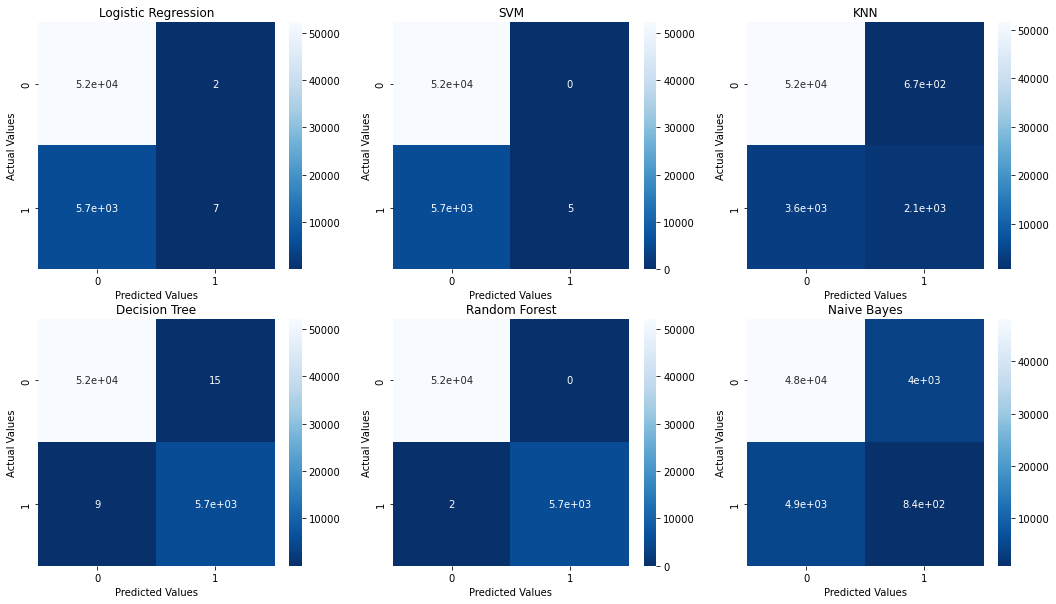

In [123]:
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

**Note** We can clearly notice that random forest and decision trees have the highest classification performance. But let's explore it a little bit more!

## ROC Visualization

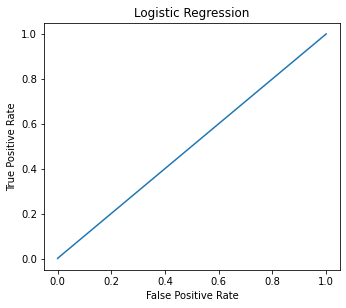

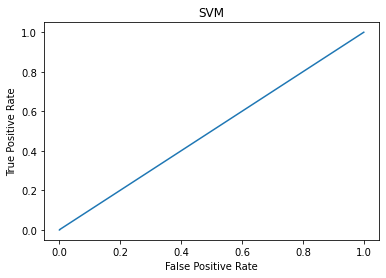

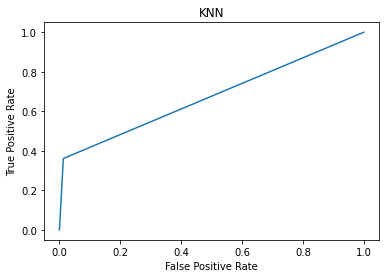

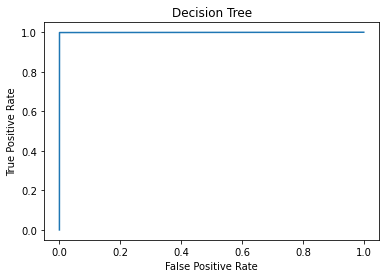

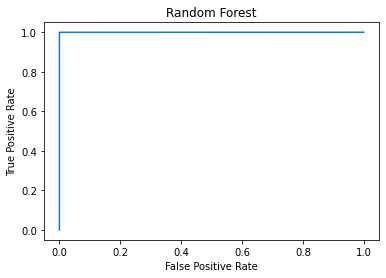

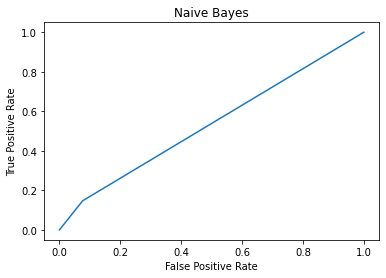

In [124]:
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    fpr = fpr_list[i]
    tpr = tpr_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    #create ROC curve
    plt.plot(fpr,tpr)
    plt.title(model)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

**Important Note:** The roc curves confirm the statement above!

## Evaluation Results

In [125]:
results_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC':auc_list, 'Recall': recall_list, 'Precision': precision_list, 'F1': f1_list})
results_df 

,Model,Accuracy,AUC,Recall,Precision,F1
0,Logistic Regression,0.901470,0.50,0.001226,0.777778,0.002448
1,SVM,0.901470,0.50,0.000876,1.000000,0.001750
2,KNN,0.925373,0.67,0.361296,0.753745,0.488457
3,Decision Tree,0.999585,1.00,0.998424,0.997376,0.997900
4,Random Forest,0.999965,1.00,0.999650,1.000000,0.999825
5,Naive Bayes,0.847015,0.54,0.147461,0.174255,0.159742


We see that the dataset is highly imbalanced. We have to  use the appropiate metric. 
- The **F-Measure** is a popular metric for imbalanced classification.  
- **Accuracy** is almost universally inappropriate for imbalanced classification. The reason is, a high accuracy (or low error) is achievable by a no skill model that only predicts the majority class.

So, based on F1 Score and AUC we will keep the **random forest classifier** as the best model

In [96]:
model = RandomForestClassifier()
print(f'Training {model} model')

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
auc = round(metrics.auc(fpr,tpr),2)
f1=2 * precision * recall/(precision+recall)

print(f'{model} has f1 score = {f1}')
print(f'{model} has fpr = {fpr}')
print(f'{model} has tpr = {tpr}')
print(f'{model} has recall = {recall}')
print(f'{model} has precision = {precision}')
print(f'{model} has recall = {recall}')
print(f'{model} has auc = {auc}')


Training RandomForestClassifier() model
RandomForestClassifier() has f1 score = 0.999824837975127
RandomForestClassifier() has fpr = [0. 0. 1.]
RandomForestClassifier() has tpr = [0.         0.99964974 1.        ]
RandomForestClassifier() has recall = 0.9996497373029772
RandomForestClassifier() has precision = 1.0
RandomForestClassifier() has recall = 0.9996497373029772
RandomForestClassifier() has auc = 1.0


## Feature Importances
Here we'll find which features have the greatest importance regarding the prediction of the target value!

In [130]:
from sklearn import tree

In [131]:
importances = list(model.feature_importances_)

In [132]:
X_train.columns

Index(['elect_cons_at_12m', 'gas_cons_at_12m', 'elect_cons_last_month',
       'contract_activation_date', 'contract_end_date',
       'contract_last_mod_date', 'contract_renewal_date',
       'fcst_consumption_elect_12m', 'fcst_current_discount',
       'fcst_bill_meter_rent_12m', 'fcst_price_period_2',
       'fcst_price_power_period_1', 'client_got_gas',
       'current_paid_consumption', 'gross_margin_power_elect',
       'net_margin_power_elect', 'number_active_products', 'total_net_margin',
       'customer_antiquity_in_years', 'subscribed_power', 'reference_date',
       'price_energy_1st_period', 'price_energy_2nd_period',
       'price_energy_3rd_period', 'price_power_1st_period',
       'price_power_2nd_period', 'price_power_3rd_period'],
      dtype='object')

In [133]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: elect_cons_at_12m    Importance: 0.08
Variable: contract_activation_date Importance: 0.07
Variable: contract_end_date    Importance: 0.07
Variable: contract_last_mod_date Importance: 0.07
Variable: contract_renewal_date Importance: 0.07
Variable: fcst_consumption_elect_12m Importance: 0.07
Variable: fcst_bill_meter_rent_12m Importance: 0.07
Variable: total_net_margin     Importance: 0.07
Variable: gross_margin_power_elect Importance: 0.06
Variable: net_margin_power_elect Importance: 0.06
Variable: subscribed_power     Importance: 0.06
Variable: elect_cons_last_month Importance: 0.05
Variable: current_paid_consumption Importance: 0.05
Variable: fcst_price_period_2  Importance: 0.03
Variable: gas_cons_at_12m      Importance: 0.02
Variable: customer_antiquity_in_years Importance: 0.02
Variable: price_energy_1st_period Importance: 0.02
Variable: fcst_price_power_period_1 Importance: 0.01
Variable: client_got_gas       Importance: 0.01
Variable: number_active_products Importance: 

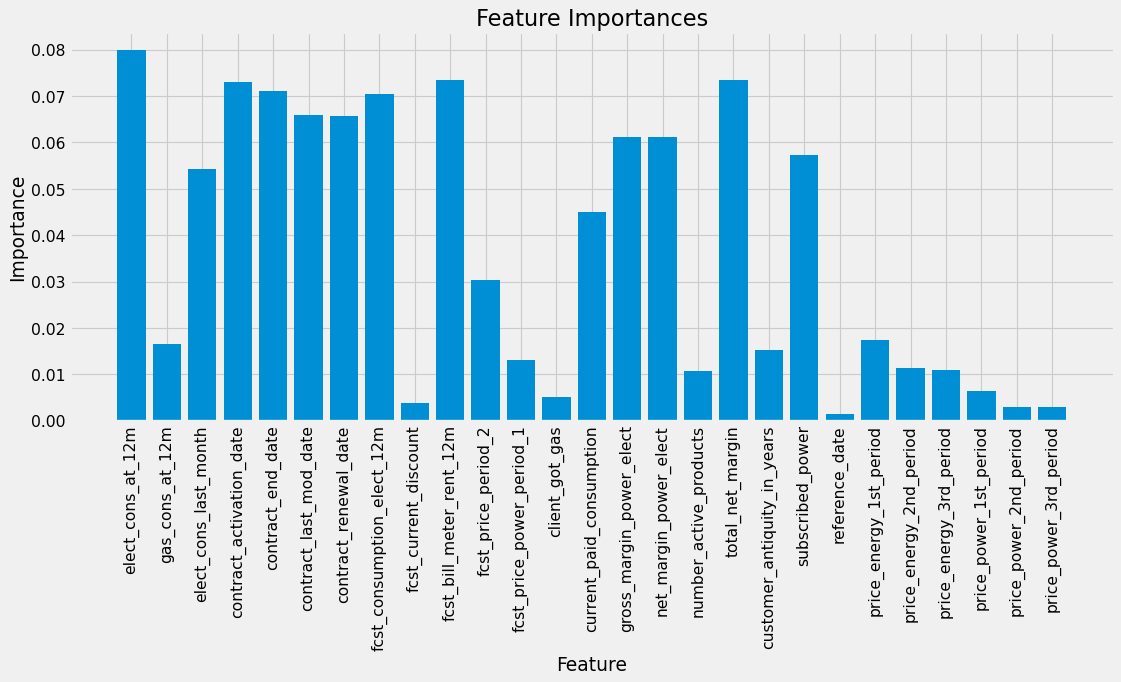

In [135]:
%matplotlib inline
fig
# Set the style
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 6), dpi=80)

# list of x locations for plotting
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, X_test.columns, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances'); 

## Save the Random Forest trained model and the datasets

In [97]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [98]:
test_data

,contract_id,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_current_discount,...,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period,does_churn,prob_of_churn
0,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.433117e+09,0.194465,0.104568,0.0,40.087205,0.0,0.0,NaN,NaN
1,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.422749e+09,0.161142,0.074282,0.0,39.926856,0.0,0.0,NaN,NaN
2,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.443658e+09,0.190280,0.103971,0.0,40.087205,0.0,0.0,NaN,NaN
3,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.425168e+09,0.161142,0.074282,0.0,39.926856,0.0,0.0,NaN,NaN
4,710982830de1987358b8b4b6a61de5f9,20834.0,0.0,822.0,1.333066e+09,1.459296e+09,1.333066e+09,1.427760e+09,818.075370,0.0,...,15.600595,1.441066e+09,0.190280,0.103971,0.0,40.087205,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48231,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.438387e+09,0.132824,0.000000,0.0,39.926855,0.0,0.0,NaN,NaN
48232,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.427846e+09,0.136859,0.000000,0.0,39.926856,0.0,0.0,NaN,NaN
48233,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.422749e+09,0.136859,0.000000,0.0,39.926856,0.0,0.0,NaN,NaN
48234,44e27783ba74e3c10aba49fae358fe0b,1400.0,0.0,240.0,1.280707e+09,1.470096e+09,1.280707e+09,1.438560e+09,144.971954,0.0,...,15.440594,1.446336e+09,0.133453,0.000000,0.0,40.087205,0.0,0.0,NaN,NaN


In [86]:
filename_test_data = 'test_data_to_evaluate.pickle'
pickle.dump(test_data,open(filename_test_data, 'wb') )

In [87]:
clean_data

,elect_cons_at_12m,gas_cons_at_12m,elect_cons_last_month,contract_activation_date,contract_end_date,contract_last_mod_date,contract_renewal_date,fcst_consumption_elect_12m,fcst_current_discount,fcst_bill_meter_rent_12m,...,total_net_margin,customer_antiquity_in_years,subscribed_power,reference_date,price_energy_1st_period,price_energy_2nd_period,price_energy_3rd_period,price_power_1st_period,price_power_2nd_period,price_power_3rd_period
0,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.176647,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
1,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.452096,0.531098,0.434405,0.000000,0.434964,0.000000,0.000000
2,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.359281,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
3,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,0.541916,0.559600,0.000000,0.000000,0.434964,0.000000,0.000000
4,0.000618,0.0,0.000000,0.669967,0.953600,0.984292,0.952431,0.013850,0.0,0.045870,...,0.015359,0.555556,0.110807,1.000000,0.520408,0.000000,0.000000,0.441582,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.176647,0.404591,0.534917,0.641470,0.303250,0.669687,0.933174
192998,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.910180,0.313763,0.496590,0.614739,0.303250,0.669687,0.933174
192999,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.000000,0.404591,0.534917,0.641470,0.303250,0.669687,0.933174
193000,0.046679,0.0,0.011685,0.868569,0.940669,0.982527,0.571882,0.357566,0.0,0.569054,...,0.340961,0.222222,0.401133,0.727545,0.352874,0.516678,0.646080,0.303250,0.669687,0.933174


In [141]:
filename_train_data = 'clean_data_after_training.pickle'
pickle.dump(clean_data,open(filename_test_data, 'wb') )

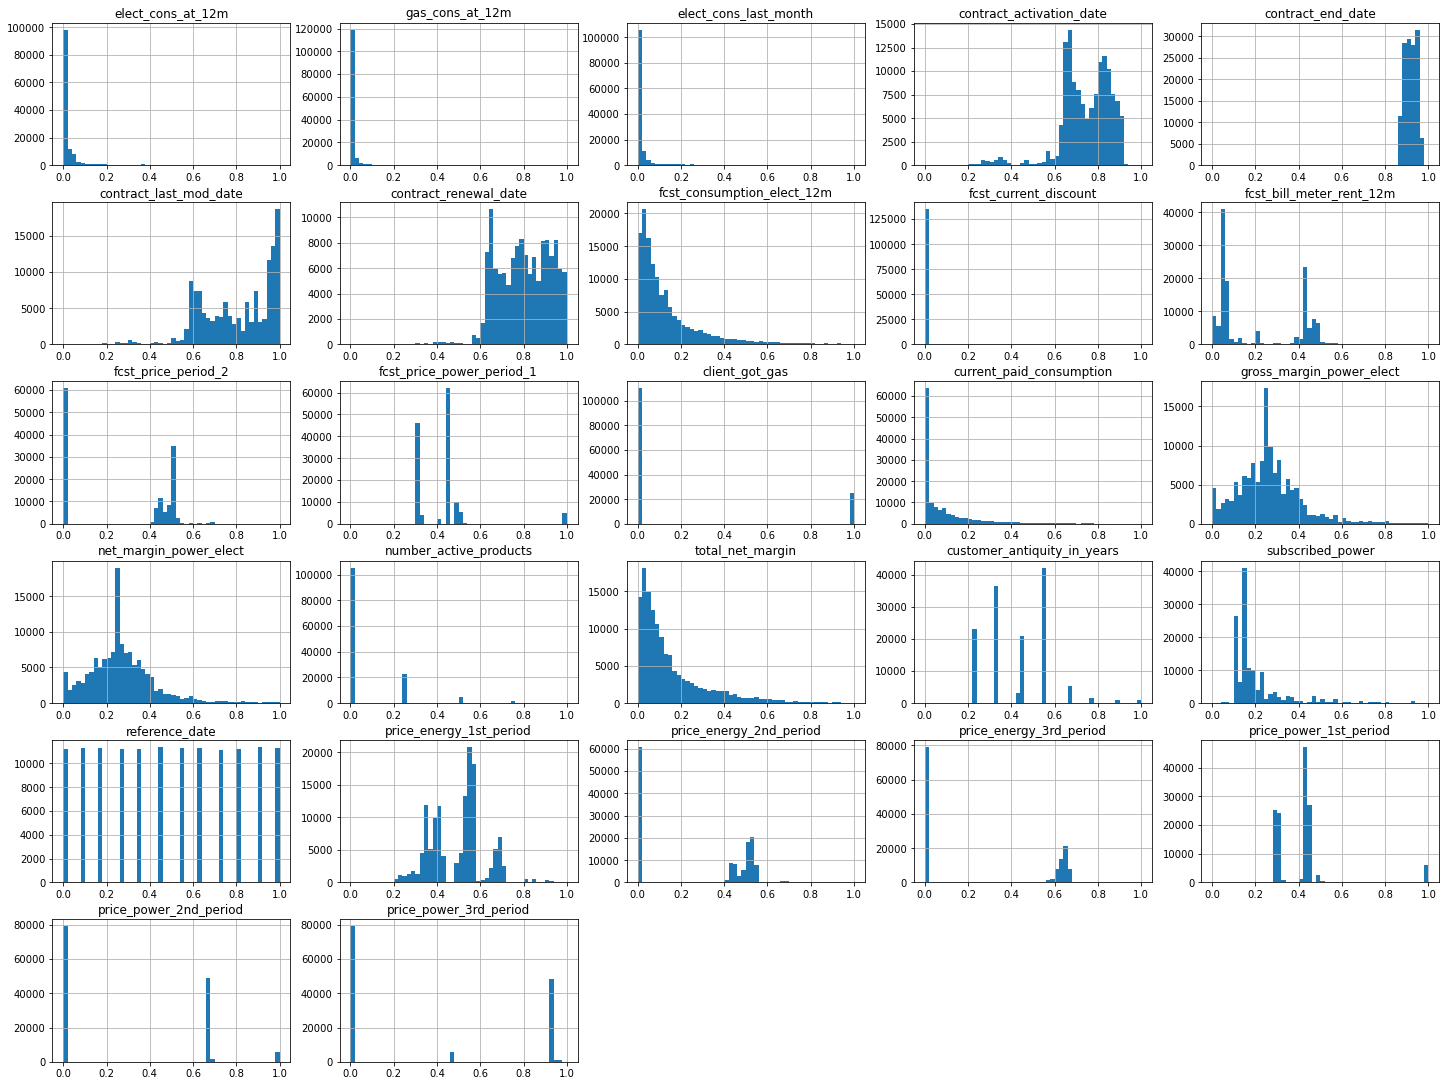

In [99]:
X_train.hist(bins=50,figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

In [108]:
import shap

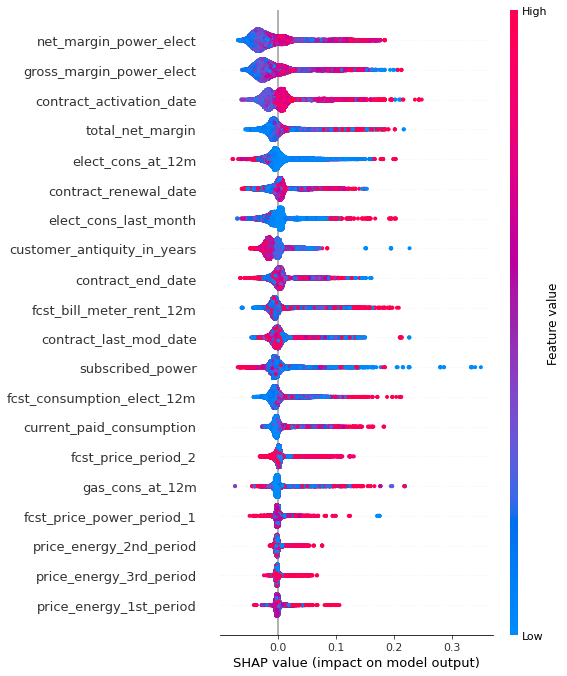

In [109]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)